In [2]:
# === STEP 1: SETUP ===
import pandas as pd
import numpy as np

# Mount Google Drive if needed:
# from google.colab import drive
# drive.mount('/content/drive')

# === STEP 2: LOAD DATA ===
file_path = '/content/Dissertation_Final_Raw.xlsx'  # update this if needed
xls = pd.ExcelFile(file_path)
print("Available sheets:", xls.sheet_names)

# Load first sheet
df = xls.parse(xls.sheet_names[0])
print("✅ Data loaded. Shape:", df.shape)

# === STEP 3: QUICK PREVIEW ===
display(df.head())
print("\n🧾 Column types:\n", df.dtypes.value_counts())
print("\n🔍 Column names:\n", df.columns.tolist())

# === STEP 4: TREAT 0s AS MISSING (EXCEPT CATEGORICAL/ID) ===
exclude_cols = ['Dataset', 'SEX']  # keep 0s here if needed

for col in df.columns:
    if col not in exclude_cols and pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].replace(0, np.nan)

# === STEP 5: CHECK MISSING VALUES ===
missing_summary = df.isna().sum()
print("\n⚠️ Missing values per column:\n", missing_summary[missing_summary > 0].sort_values(ascending=False))


FileNotFoundError: [Errno 2] No such file or directory: '/content/Dissertation_Final_Raw.xlsx'

In [64]:
# Function to summarize anomalies in all columns
def anomaly_report(df):
    report = pd.DataFrame(index=df.columns)
    report['NaN_count'] = df.isna().sum()
    report['Zero_count'] = (df == 0).sum(numeric_only=True)
    report['Blank_count'] = (df == '').sum()
    report['Total_rows'] = len(df)
    report['% Missing (NaN or 0 or blank)'] = (
        (report['NaN_count'] + report['Zero_count'] + report['Blank_count']) / report['Total_rows'] * 100
    ).round(2)
    return report.sort_values(by='% Missing (NaN or 0 or blank)', ascending=False)

# Run the anomaly report
anomalies = anomaly_report(df)
import pandas as pd
pd.set_option('display.max_rows', 100)  # show more rows if needed
display(anomalies.head(50))  # show top 50 columns with most missing


NaN_count  Zero_count  Blank_count  Total_rows  \
VO2_162        414           0            0         664   
VO2_7          414           0            0         664   
VO2_8          414           0            0         664   
VO2_36         414           0            0         664   
VO2_37         414           0            0         664   
VO2_161        412           0            0         664   
VO2_6          412           0            0         664   
VO2_159        412           0            0         664   
VO2_174        412           0            0         664   
VO2_176        412           0            0         664   
VO2_172        412           0            0         664   
VO2_57         412           0            0         664   
VO2_59         412           0            0         664   
VO2_58         412           0            0         664   
VO2_53         412           0            0         664   
VO2_64         412           0            0         664   
VO2_52         412           0            0         664   
VO2_61         412           0            0         664   
VO2_63         412           0            0         664   
VO2_62         412           0            0         664   
VO2_178        412           0            0         664   
VO2_179        412           0            0         664   
VO2_32         412           0            0         664   
VO2_33         412           0            0         664   
VO2_158        412           0            0         664   
VO2_163        412           0            0         664   
VO2_164        412           0            0         664   
VO2_166        412           0            0         664   
VO2_167        412           0            0         664   
VO2_168        412           0            0         664   
VO2_173        412           0            0         664   
VO2_169        412           0            0         664   
VO2_171        412           0            0         664   
VO2_38         412           0            0         664   
VO2_34         412           0            0         664   
VO2_66         412           0            0         664   
VO2_54         412           0            0         664   
VO2_56         412           0            0         664   
VO2_48         412           0            0         664   
VO2_49         412           0            0         664   
VO2_51         412           0            0         664   
VO2_26         412           0            0         664   
VO2_43         412           0            0         664   
VO2_47         412           0            0         664   
VO2_46         412           0            0         664   
VO2_44         412           0            0         664   
VO2_39         412           0            0         664   
VO2_41         412           0            0         664   
VO2_42         412           0            0         664   
VO2_156        412           0            0         664   

         % Missing (NaN or 0 or blank)  
VO2_162                          62.35  
VO2_7                            62.35  
VO2_8                            62.35  
VO2_36                           62.35  
VO2_37                           62.35  
VO2_161                          62.05  
VO2_6                            62.05  
VO2_159                          62.05  
VO2_174                          62.05  
VO2_176                          62.05  
VO2_172                          62.05  
VO2_57                           62.05  
VO2_59                           62.05  
VO2_58                           62.05  
VO2_53                           62.05  
VO2_64                           62.05  
VO2_52                           62.05  
VO2_61                           62.05  
VO2_63                           62.05  
VO2_62                           62.05  
VO2_178                          62.05  
VO2_179                          62.05  
VO2_32                           62.05  
VO2_33         

In [71]:
# === Generate FILL RATE report ===

# Fill rate = proportion of non-missing entries
fill_rate = df.notna().mean().sort_values(ascending=True) * 100

# Create a summary dataframe
fill_report = pd.DataFrame({
    'Column': fill_rate.index,
    'Fill Rate (%)': fill_rate.values.round(2)
})

# Display top and bottom
print("🔍 Lowest fill rate columns:")
display(fill_report.head(20))

print("\n✅ Highest fill rate columns:")
display(fill_report.tail(20))


🔍 Lowest fill rate columns:


Column  Fill Rate (%)
0   VO2_175          100.0
1   VO2_174          100.0
2   VO2_173          100.0
3   VO2_172          100.0
4   VO2_171          100.0
5   VO2_170          100.0
6   VO2_169          100.0
7   VO2_168          100.0
8   VO2_167          100.0
9   VO2_166          100.0
10  VO2_165          100.0
11  VO2_164          100.0
12  VO2_163          100.0
13  VO2_162          100.0
14  VO2_161          100.0
15  VO2_160          100.0
16  Power_7          100.0
17  Power_6          100.0
18  Power_5          100.0
19  Power_4          100.0


✅ Highest fill rate columns:


Column  Fill Rate (%)
531  Power_20          100.0
532  Power_19          100.0
533  Power_18          100.0
534  Power_17          100.0
535  Power_16          100.0
536  Power_15          100.0
537  Power_14          100.0
538  Power_13          100.0
539  Power_12          100.0
540  Power_11          100.0
541  Power_10          100.0
542   Power_9          100.0
543   Power_8          100.0
544   VO2_177          100.0
545   VO2_178          100.0
546   VO2_179          100.0
547   VO2_180          100.0
548    CP (W)          100.0
549    W' (J)          100.0
550   Dataset          100.0

In [72]:
from sklearn.impute import SimpleImputer

# Select only numeric columns (exclude SEX and Dataset)
numeric_cols = df.select_dtypes(include=['number']).columns

# Median imputation for all numeric columns
imputer = SimpleImputer(strategy='median')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Final check
print("✅ All missing values imputed.")
print("Remaining NaNs:", df.isna().sum().sum())


✅ All missing values imputed.
Remaining NaNs: 0


In [73]:
# Strip leading/trailing spaces from all column names
df.columns = df.columns.str.strip()


In [74]:
# === Extract relevant columns ===
base_features = ['SEX', 'AGE (y)', 'BM (kg)', 'Height (m)',
                 'VO2peak (L.min-1)', 'Peak Power Output (W)',
                 'GET (L.min-1)', 'GET (W)']

targets = ['CP (W)', "W' (J)"]

df_base = df[base_features + targets].copy()


In [75]:
# One-hot encode SEX (creates column 'SEX_M')
df_base = pd.get_dummies(df_base, columns=['SEX'], drop_first=True)

# Separate features and targets
X = df_base.drop(columns=['CP (W)', "W' (J)"])
y_cp = df_base['CP (W)']
y_wp = df_base["W' (J)"]


/tmp/ipython-input-1975675400.py:8: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


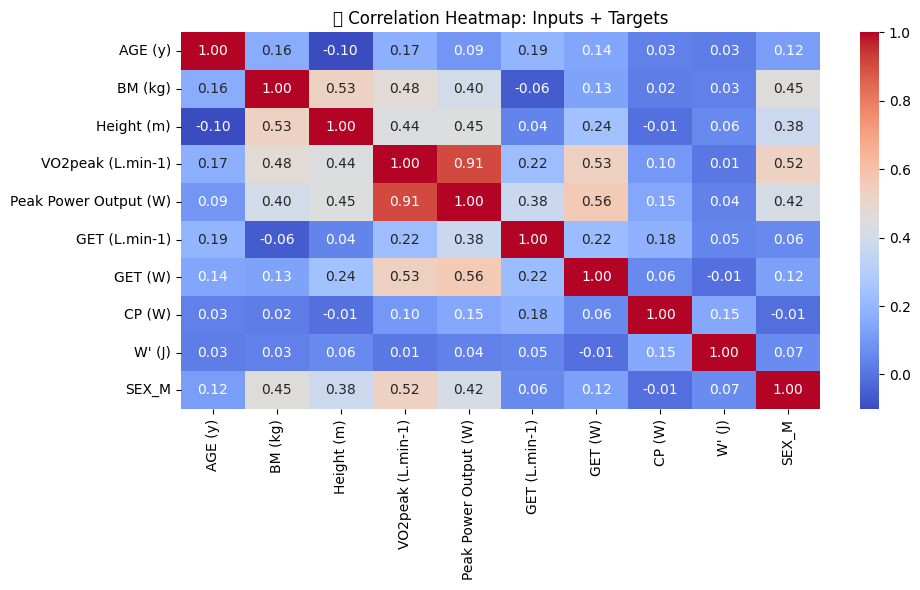

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


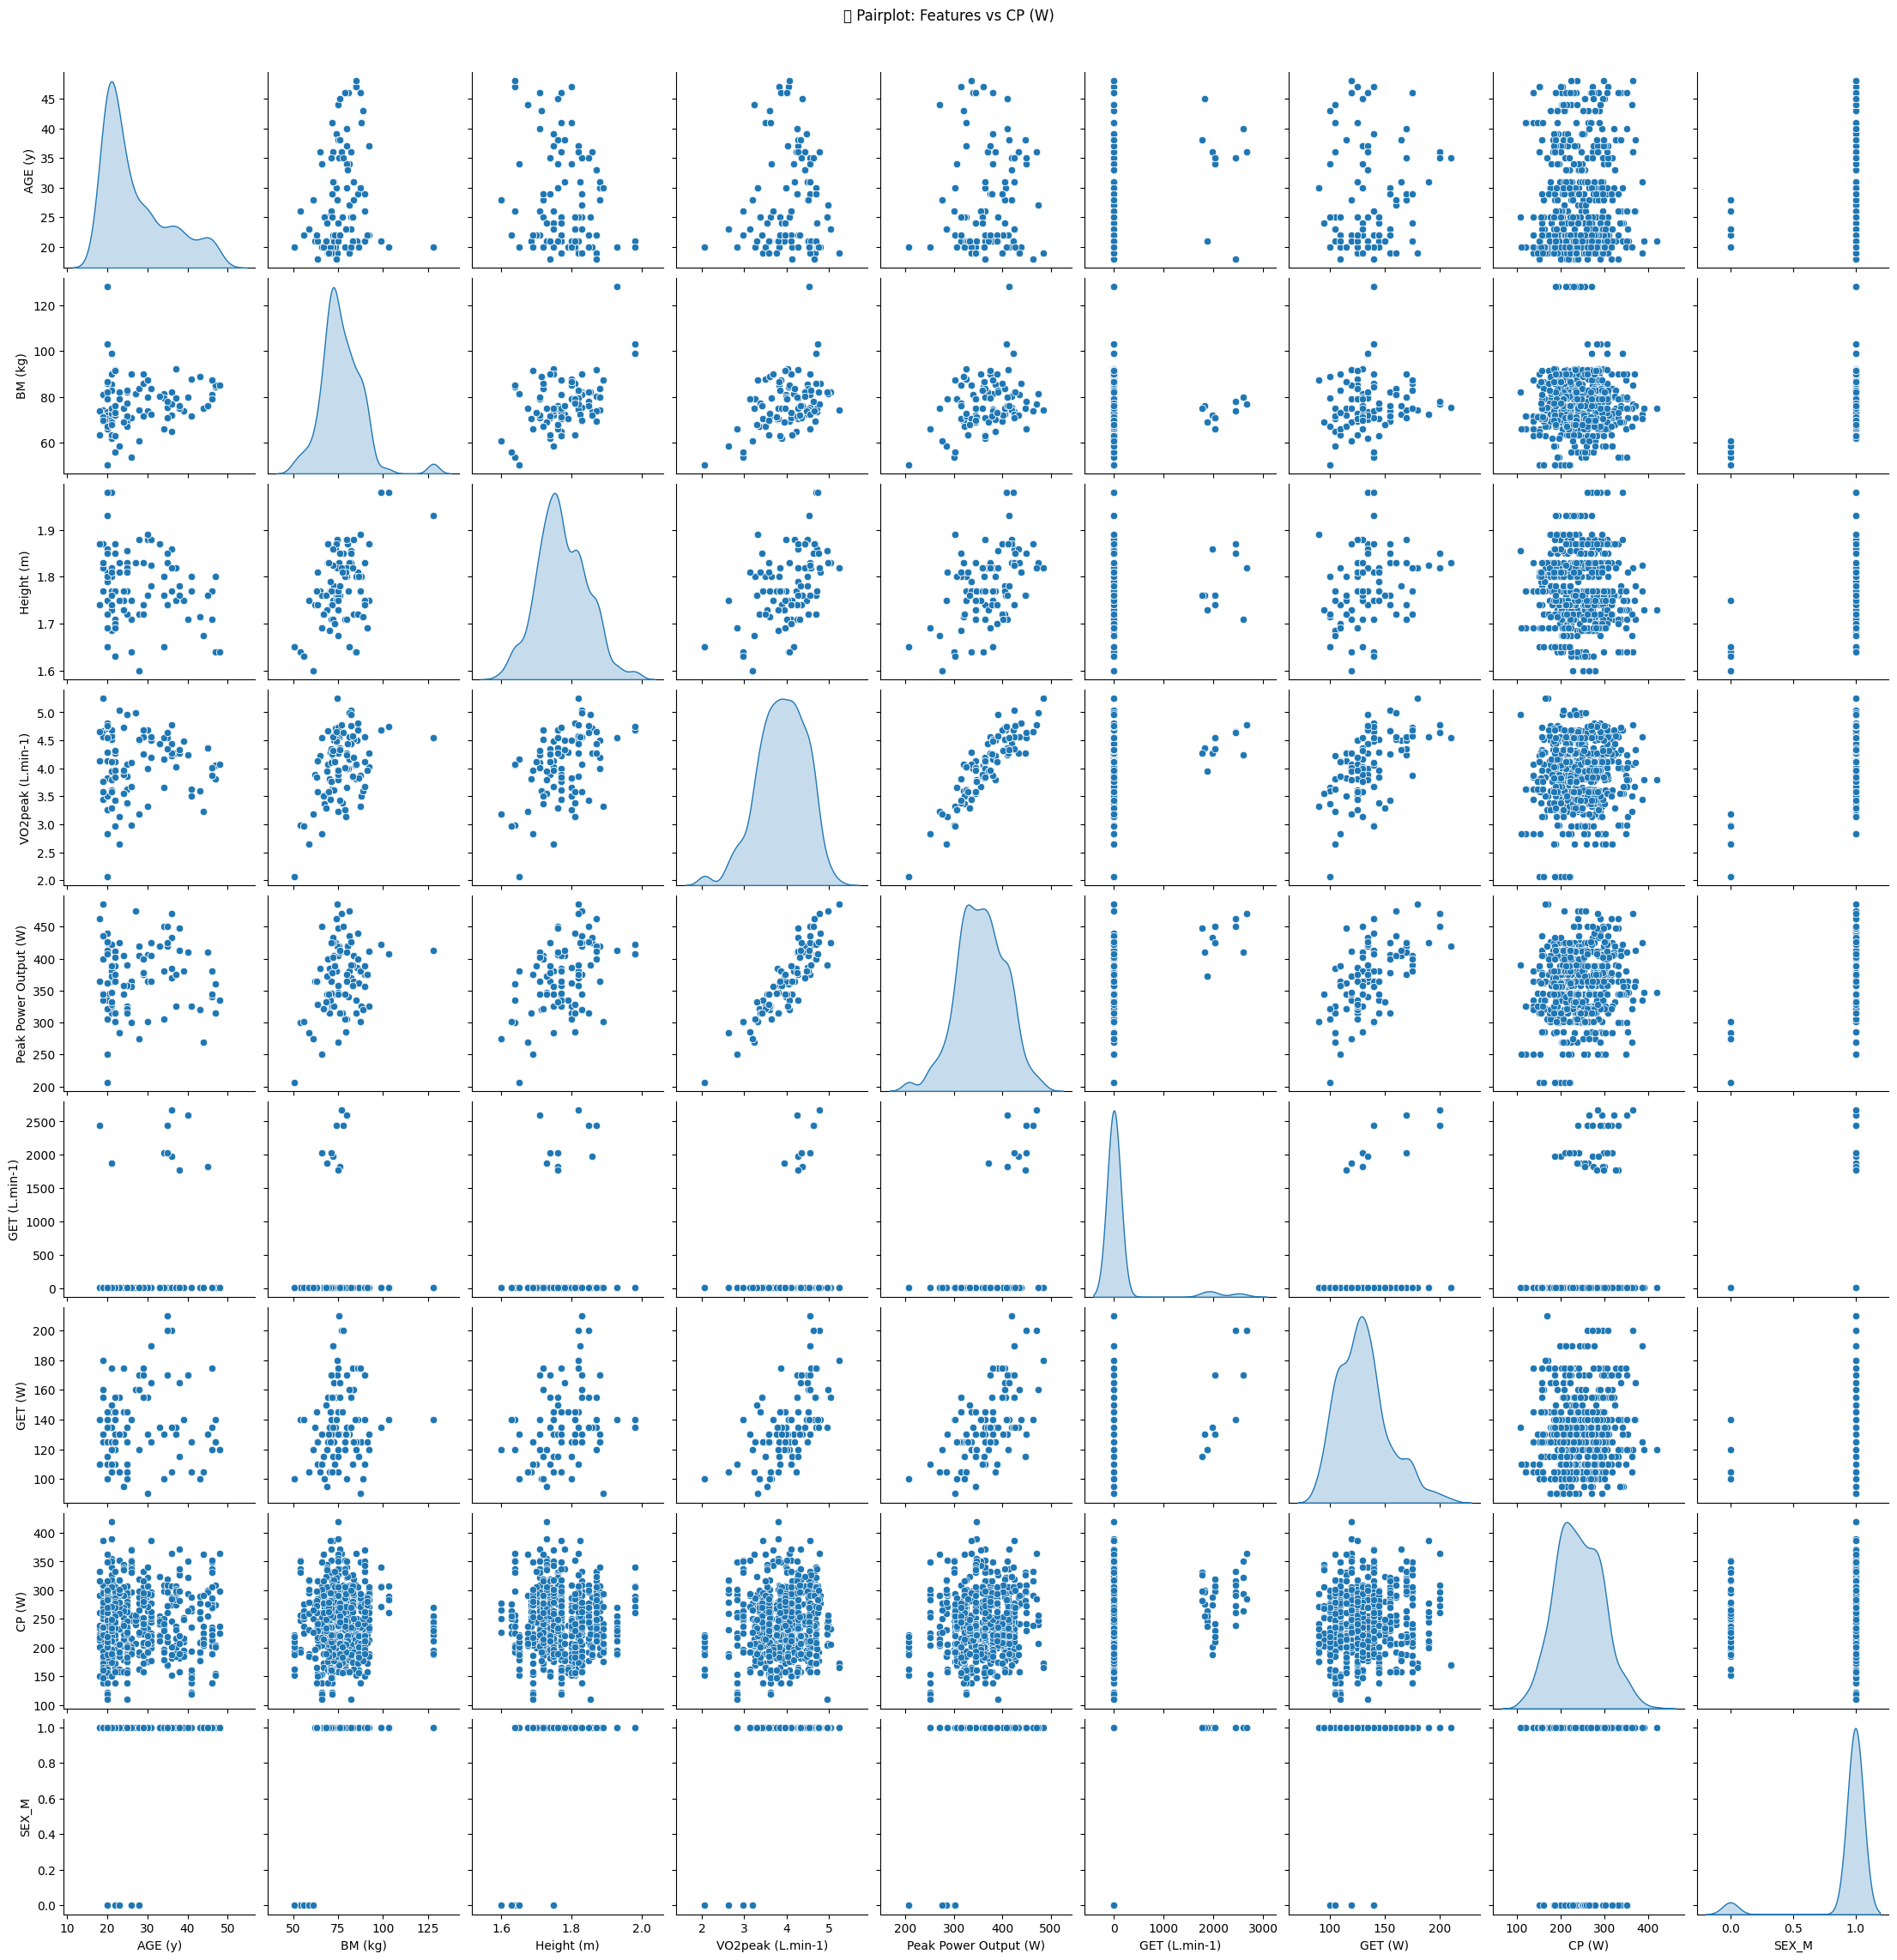

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_base.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("🔗 Correlation Heatmap: Inputs + Targets")
plt.tight_layout()
plt.show()

# Pairplot against CP (W)
sns.pairplot(df_base[['AGE (y)', 'BM (kg)', 'Height (m)', 'VO2peak (L.min-1)',
                      'Peak Power Output (W)', 'GET (L.min-1)', 'GET (W)',
                      'CP (W)', 'SEX_M']], diag_kind='kde')
plt.suptitle("📊 Pairplot: Features vs CP (W)", y=1.02)
plt.show()


In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_cp_train, y_cp_test, y_wp_train, y_wp_test = train_test_split(
    X, y_cp, y_wp, test_size=0.2, random_state=42)


In [78]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_percentage_error

# === Define models ===
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "MLP Regressor": MLPRegressor(random_state=42, max_iter=1000)
}

# === Store results ===
results_cp = {}
results_wp = {}

# === Train & Evaluate ===
for name, model in models.items():
    # Fit models
    model.fit(X_train, y_cp_train)
    pred_cp = model.predict(X_test)
    mape_cp = mean_absolute_percentage_error(y_cp_test, pred_cp)

    model.fit(X_train, y_wp_train)
    pred_wp = model.predict(X_test)
    mape_wp = mean_absolute_percentage_error(y_wp_test, pred_wp)

    results_cp[name] = mape_cp
    results_wp[name] = mape_wp

# === Display results ===
print("📊 MAPE on CP (W):")
for k, v in sorted(results_cp.items(), key=lambda item: item[1]):
    print(f"{k:20}: {v:.3%}")

print("\n📊 MAPE on W' (J):")
for k, v in sorted(results_wp.items(), key=lambda item: item[1]):
    print(f"{k:20}: {v:.3%}")


📊 MAPE on CP (W):
Random Forest       : 15.970%
Gradient Boosting   : 16.028%
SVR                 : 16.853%
Linear Regression   : 17.021%
Ridge Regression    : 17.057%
KNN                 : 18.101%
MLP Regressor       : 18.250%

📊 MAPE on W' (J):
MLP Regressor       : 42.342%
Ridge Regression    : 44.489%
Linear Regression   : 44.623%
SVR                 : 45.411%
KNN                 : 45.485%
Gradient Boosting   : 45.576%
Random Forest       : 46.293%


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [79]:
!pip install lightgbm


In [80]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_percentage_error
from lightgbm import LGBMRegressor

# === Define models ===
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "MLP Regressor": MLPRegressor(random_state=42, max_iter=1000)
}

# === Store results ===
results_cp = {}
results_wp = {}

# === Train & Evaluate ===
for name, model in models.items():
    model.fit(X_train, y_cp_train)
    pred_cp = model.predict(X_test)
    mape_cp = mean_absolute_percentage_error(y_cp_test, pred_cp)

    model.fit(X_train, y_wp_train)
    pred_wp = model.predict(X_test)
    mape_wp = mean_absolute_percentage_error(y_wp_test, pred_wp)

    results_cp[name] = mape_cp
    results_wp[name] = mape_wp

# === Display results ===
print("📊 MAPE on CP (W):")
for k, v in sorted(results_cp.items(), key=lambda item: item[1]):
    print(f"{k:20}: {v:.3%}")

print("\n📊 MAPE on W' (J):")
for k, v in sorted(results_wp.items(), key=lambda item: item[1]):
    print(f"{k:20}: {v:.3%}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 345
[LightGBM] [Info] Number of data points in the train set: 531, number of used features: 8
[LightGBM] [Info] Start training from score 243.508566
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


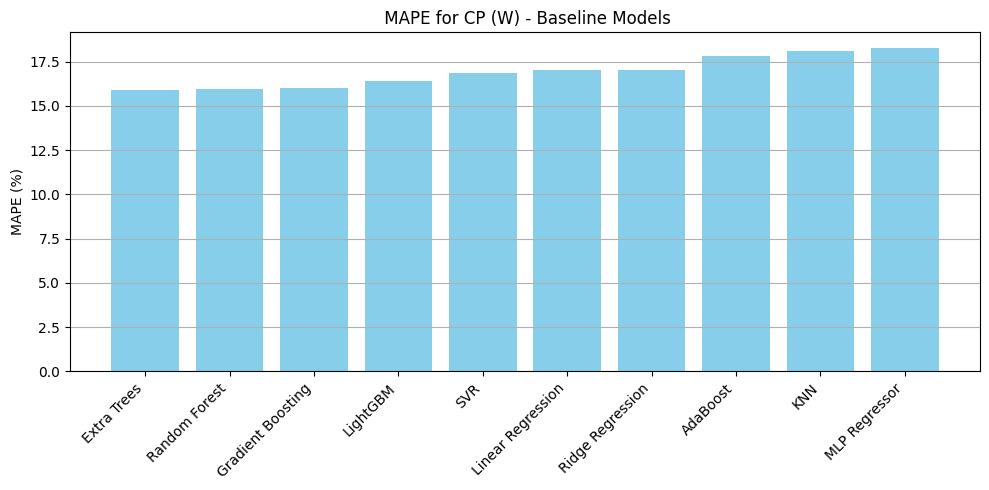

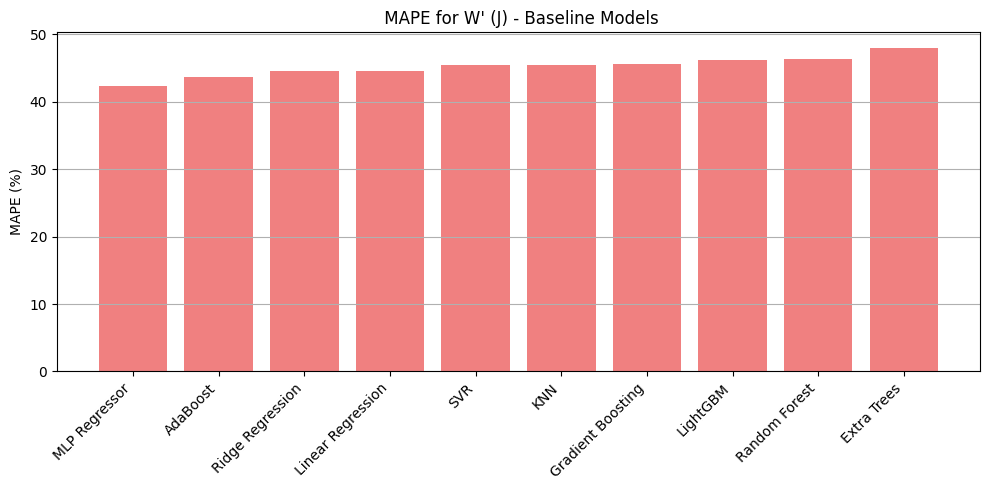

In [81]:
import matplotlib.pyplot as plt

# Convert to sorted lists for plotting
cp_sorted = sorted(results_cp.items(), key=lambda item: item[1])
wp_sorted = sorted(results_wp.items(), key=lambda item: item[1])

# CP (W) MAPE Bar Plot
plt.figure(figsize=(10, 5))
plt.bar([x[0] for x in cp_sorted], [x[1]*100 for x in cp_sorted], color='skyblue')
plt.ylabel('MAPE (%)')
plt.title(' MAPE for CP (W) - Baseline Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()

# W' (J) MAPE Bar Plot
plt.figure(figsize=(10, 5))
plt.bar([x[0] for x in wp_sorted], [x[1]*100 for x in wp_sorted], color='lightcoral')
plt.ylabel("MAPE (%)")
plt.title(" MAPE for W' (J) - Baseline Models")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()


In [82]:
import pandas as pd

comparison_df = pd.DataFrame({
    'Model': list(results_cp.keys()),
    'MAPE_CP (%)': [v*100 for v in results_cp.values()],
    "MAPE_W' (%)": [v*100 for v in results_wp.values()]
}).sort_values(by='MAPE_CP (%)')

display(comparison_df)


Model  MAPE_CP (%)  MAPE_W' (%)
5        Extra Trees    15.928482    47.890937
2      Random Forest    15.969586    46.292842
3  Gradient Boosting    16.028005    45.575563
6           LightGBM    16.395919    46.199962
7                SVR    16.853360    45.411203
0  Linear Regression    17.021036    44.623253
1   Ridge Regression    17.056634    44.488926
4           AdaBoost    17.823249    43.683126
8                KNN    18.101171    45.484757
9      MLP Regressor    18.249847    42.341783

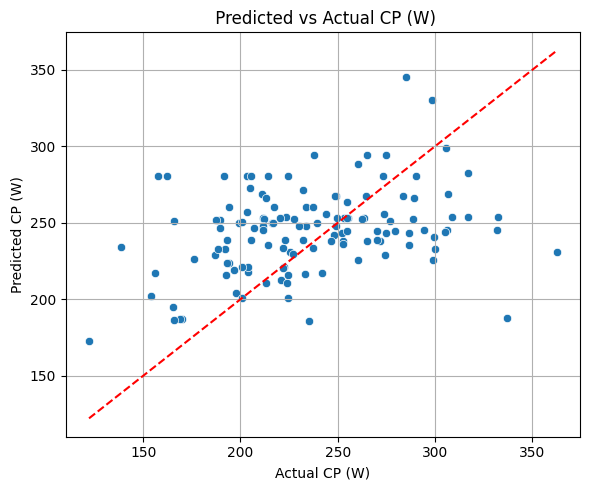

In [83]:
best_model = models["Gradient Boosting"]  # e.g., "LightGBM"
best_model.fit(X_train, y_cp_train)
y_cp_pred = best_model.predict(X_test)

plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_cp_test, y=y_cp_pred)
plt.plot([y_cp_test.min(), y_cp_test.max()], [y_cp_test.min(), y_cp_test.max()], 'r--')
plt.xlabel("Actual CP (W)")
plt.ylabel("Predicted CP (W)")
plt.title(" Predicted vs Actual CP (W)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [84]:
# Choose the best model name from your earlier results
best_model_name = "Gradient Boosting"  # ← change if needed

# Refit the model on CP and W′
best_model_cp = models[best_model_name]
best_model_wp = models[best_model_name]

best_model_cp.fit(X_train, y_cp_train)
best_model_wp.fit(X_train, y_wp_train)

# Predict on test set
cp_pred = best_model_cp.predict(X_test)
wp_pred = best_model_wp.predict(X_test)


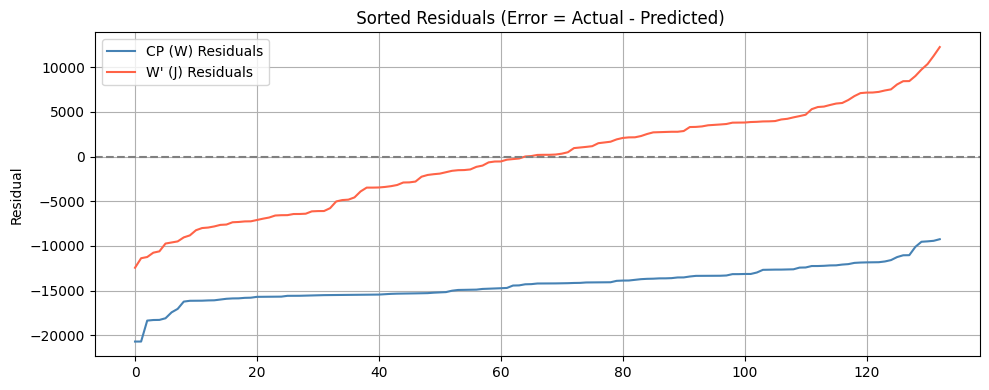

In [85]:
# Residuals = true - predicted
residuals_cp = y_cp_test - cp_pred
residuals_wp = y_wp_test - wp_pred

plt.figure(figsize=(10, 4))
plt.plot(sorted(residuals_cp.values), label="CP (W) Residuals", color="steelblue")
plt.plot(sorted(residuals_wp.values), label="W' (J) Residuals", color="tomato")
plt.axhline(0, linestyle='--', color='gray')
plt.title(" Sorted Residuals (Error = Actual - Predicted)")
plt.ylabel("Residual")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


In [86]:
# Step 1: Make sure column names are stripped of spaces
df.columns = df.columns.str.strip()

# Step 2: Define the full feature set
base_features = ['SEX', 'AGE (y)', 'BM (kg)', 'Height (m)',
                 'VO2peak (L.min-1)', 'Peak Power Output (W)',
                 'GET (L.min-1)', 'GET (W)']

# Time-series features
power_cols = [col for col in df.columns if col.startswith("Power_")]
cadence_cols = [col for col in df.columns if col.startswith("Cadence_")]
vo2_cols = [col for col in df.columns if col.startswith("VO2_")]

full_features = base_features + power_cols + cadence_cols + vo2_cols
targets = ['CP (W)', "W' (J)"]

# Step 3: Prepare the dataset
df_full = df[full_features + targets].copy()
df_full = pd.get_dummies(df_full, columns=['SEX'], drop_first=True)

# Step 4: Split into train/test
from sklearn.model_selection import train_test_split

X = df_full.drop(columns=targets)
y_cp = df_full['CP (W)']
y_wp = df_full["W' (J)"]

X_train, X_test, y_cp_train, y_cp_test, y_wp_train, y_wp_test = train_test_split(
    X, y_cp, y_wp, test_size=0.2, random_state=42)

print("✅ Data shape:", X.shape)


✅ Data shape: (664, 548)


In [87]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Define all models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "MLP Regressor": MLPRegressor(random_state=42, max_iter=1000)
}

# Run models and compute MAPE
results_cp = {}
results_wp = {}

for name, model in models.items():
    # CP (W)
    model.fit(X_train, y_cp_train)
    cp_pred = model.predict(X_test)
    mape_cp = mean_absolute_percentage_error(y_cp_test, cp_pred)

    # W' (J)
    model.fit(X_train, y_wp_train)
    wp_pred = model.predict(X_test)
    mape_wp = mean_absolute_percentage_error(y_wp_test, wp_pred)

    results_cp[name] = mape_cp
    results_wp[name] = mape_wp

# Print results
print("📊 MAPE on CP (W):")
for k, v in sorted(results_cp.items(), key=lambda item: item[1]):
    print(f"{k:20}: {v:.2%}")

print("\n📊 MAPE on W' (J):")
for k, v in sorted(results_wp.items(), key=lambda item: item[1]):
    print(f"{k:20}: {v:.2%}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007643 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 63983
[LightGBM] [Info] Number of data points in the train set: 531, number of used features: 548
[LightGBM] [Info] Start training from score 243.508566
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

In [88]:
# Step 1: Redefine truncated time-series columns
power_cols_120 = [f'Power_{i}' for i in range(1, 121)]
cadence_cols_120 = [f'Cadence_{i}' for i in range(1, 121)]
vo2_cols_120 = [f'VO2_{i}' for i in range(1, 121)]

# Step 2: Define full feature set
base_features = ['SEX', 'AGE (y)', 'BM (kg)', 'Height (m)',
                 'VO2peak (L.min-1)', 'Peak Power Output (W)',
                 'GET (L.min-1)', 'GET (W)']

truncated_features = base_features + power_cols_120 + cadence_cols_120 + vo2_cols_120
targets = ['CP (W)', "W' (J)"]

# Step 3: Create new DataFrame
df_trunc = df[truncated_features + targets].copy()
df_trunc = pd.get_dummies(df_trunc, columns=['SEX'], drop_first=True)

# Step 4: Split into train/test
X = df_trunc.drop(columns=targets)
y_cp = df_trunc['CP (W)']
y_wp = df_trunc["W' (J)"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_cp_train, y_cp_test, y_wp_train, y_wp_test = train_test_split(
    X, y_cp, y_wp, test_size=0.2, random_state=42)

print("✅ Truncated feature set shape:", X.shape)


✅ Truncated feature set shape: (664, 368)


In [89]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Define all models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "MLP Regressor": MLPRegressor(random_state=42, max_iter=1000)
}

# Run models and compute MAPE
results_cp_120 = {}
results_wp_120 = {}

for name, model in models.items():
    # CP (W)
    model.fit(X_train, y_cp_train)
    cp_pred = model.predict(X_test)
    mape_cp = mean_absolute_percentage_error(y_cp_test, cp_pred)

    # W' (J)
    model.fit(X_train, y_wp_train)
    wp_pred = model.predict(X_test)
    mape_wp = mean_absolute_percentage_error(y_wp_test, wp_pred)

    results_cp_120[name] = mape_cp
    results_wp_120[name] = mape_wp

# Print results
print("📊 MAPE on CP (W) [First 120s]:")
for k, v in sorted(results_cp_120.items(), key=lambda item: item[1]):
    print(f"{k:20}: {v:.2%}")

print("\n📊 MAPE on W' (J) [First 120s]:")
for k, v in sorted(results_wp_120.items(), key=lambda item: item[1]):
    print(f"{k:20}: {v:.2%}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003816 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 43373
[LightGBM] [Info] Number of data points in the train set: 531, number of used features: 368
[LightGBM] [Info] Start training from score 243.508566
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

In [101]:
# Step 1: Define 60-second time-series columns
power_cols_60 = [f'Power_{i}' for i in range(1, 61)]
cadence_cols_60 = [f'Cadence_{i}' for i in range(1, 61)]
vo2_cols_60 = [f'VO2_{i}' for i in range(1, 61)]

# Step 2: Combine with base features
base_features = ['SEX', 'AGE (y)', 'BM (kg)', 'Height (m)',
                 'VO2peak (L.min-1)', 'Peak Power Output (W)',
                 'GET (L.min-1)', 'GET (W)']

truncated_60s_features = base_features + power_cols_60 + cadence_cols_60 + vo2_cols_60
targets = ['CP (W)', "W' (J)"]

# Step 3: Create new DataFrame with dummies
df_60 = df[truncated_60s_features + targets].copy()
df_60 = pd.get_dummies(df_60, columns=['SEX'], drop_first=True)

# Step 4: Split into X/y and train/test
X = df_60.drop(columns=targets)
y_cp = df_60['CP (W)']
y_wp = df_60["W' (J)"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_cp_train, y_cp_test, y_wp_train, y_wp_test = train_test_split(
    X, y_cp, y_wp, test_size=0.2, random_state=42)

print("✅ 60s feature set shape:", X.shape)


✅ 60s feature set shape: (664, 188)


In [102]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Define all models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "MLP Regressor": MLPRegressor(random_state=42, max_iter=1000)
}

# Run models and compute MAPE
results_cp_60 = {}
results_wp_60 = {}

for name, model in models.items():
    # CP (W)
    model.fit(X_train, y_cp_train)
    cp_pred = model.predict(X_test)
    mape_cp = mean_absolute_percentage_error(y_cp_test, cp_pred)

    # W' (J)
    model.fit(X_train, y_wp_train)
    wp_pred = model.predict(X_test)
    mape_wp = mean_absolute_percentage_error(y_wp_test, wp_pred)

    results_cp_60[name] = mape_cp
    results_wp_60[name] = mape_wp

# Print results
print("📊 MAPE on CP (W) [First 60s]:")
for k, v in sorted(results_cp_60.items(), key=lambda item: item[1]):
    print(f"{k:20}: {v:.2%}")

print("\n📊 MAPE on W' (J) [First 60s]:")
for k, v in sorted(results_wp_60.items(), key=lambda item: item[1]):
    print(f"{k:20}: {v:.2%}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001927 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22143
[LightGBM] [Info] Number of data points in the train set: 531, number of used features: 188
[LightGBM] [Info] Start training from score 243.508566
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

In [104]:
# Step 1: Select columns for first 30 seconds
power_cols_30 = [f'Power_{i}' for i in range(1, 31)]
cadence_cols_30 = [f'Cadence_{i}' for i in range(1, 31)]
vo2_cols_30 = [f'VO2_{i}' for i in range(1, 31)]

# Step 2: Combine with base physiological + ramp test features
base_features = ['SEX', 'AGE (y)', 'BM (kg)', 'Height (m)',
                 'VO2peak (L.min-1)', 'Peak Power Output (W)',
                 'GET (L.min-1)', 'GET (W)']

truncated_30s_features = base_features + power_cols_30 + cadence_cols_30 + vo2_cols_30
targets = ['CP (W)', "W' (J)"]

# Step 3: Subset the data and encode
df_30 = df[truncated_30s_features + targets].copy()
df_30 = pd.get_dummies(df_30, columns=['SEX'], drop_first=True)

# Step 4: Train-test split
X = df_30.drop(columns=targets)
y_cp = df_30['CP (W)']
y_wp = df_30["W' (J)"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_cp_train, y_cp_test, y_wp_train, y_wp_test = train_test_split(
    X, y_cp, y_wp, test_size=0.2, random_state=42)

print("✅ 30s feature set shape:", X.shape)


✅ 30s feature set shape: (664, 98)


In [36]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "MLP Regressor": MLPRegressor(random_state=42, max_iter=1000)
}

# Run and record MAPE
results_cp_30 = {}
results_wp_30 = {}

for name, model in models.items():
    # CP (W)
    model.fit(X_train, y_cp_train)
    cp_pred = model.predict(X_test)
    mape_cp = mean_absolute_percentage_error(y_cp_test, cp_pred)

    # W' (J)
    model.fit(X_train, y_wp_train)
    wp_pred = model.predict(X_test)
    mape_wp = mean_absolute_percentage_error(y_wp_test, wp_pred)

    results_cp_30[name] = mape_cp
    results_wp_30[name] = mape_wp

# Show results
print("📊 MAPE on CP (W) [First 30s]:")
for k, v in sorted(results_cp_30.items(), key=lambda item: item[1]):
    print(f"{k:20}: {v:.2%}")

print("\n📊 MAPE on W' (J) [First 30s]:")
for k, v in sorted(results_wp_30.items(), key=lambda item: item[1]):
    print(f"{k:20}: {v:.2%}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000898 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11430
[LightGBM] [Info] Number of data points in the train set: 531, number of used features: 98
[LightGBM] [Info] Start training from score 243.508566
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

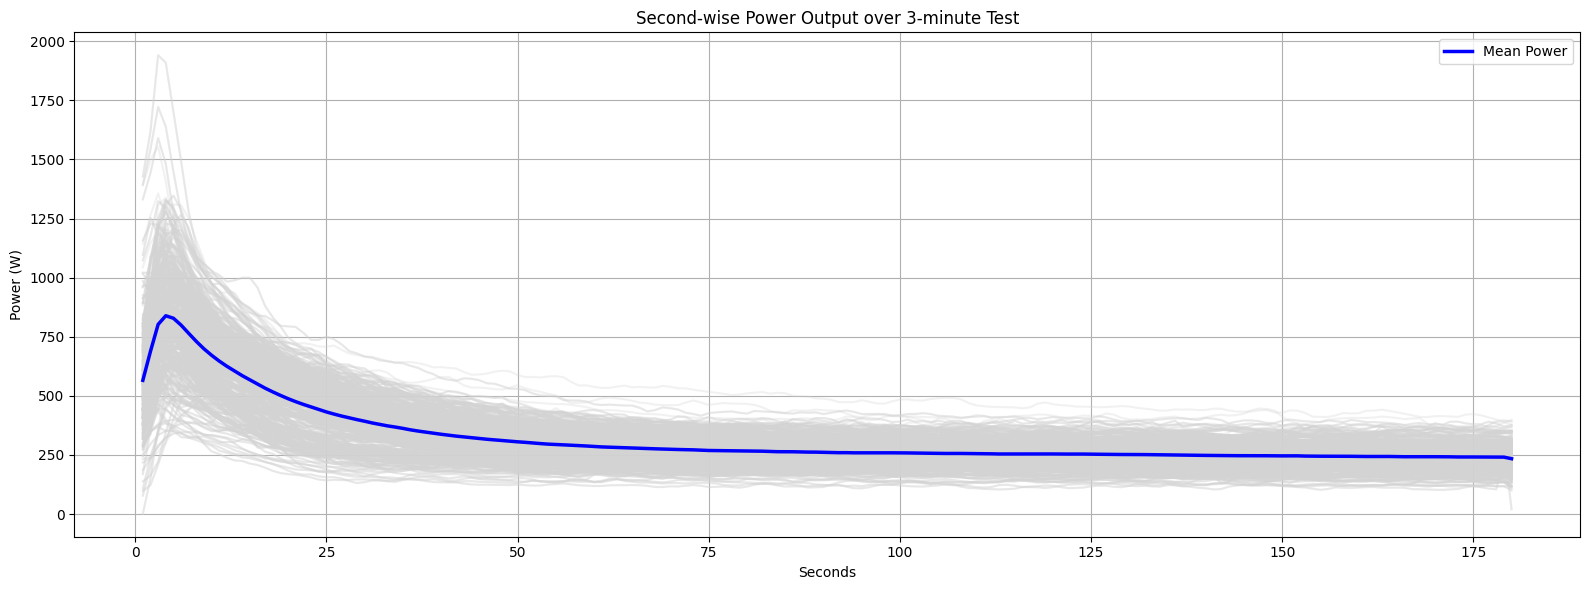

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Extract only Power columns
power_cols = [col for col in df.columns if col.startswith("Power_")]
power_df = df[power_cols].copy()

# Step 2: Line Plot – All athletes (light lines) + Mean (bold line)
plt.figure(figsize=(16, 6))
for i in range(power_df.shape[0]):
    plt.plot(range(1, 181), power_df.iloc[i], color='lightgray', alpha=0.3)

# Plot mean across all athletes
mean_power = power_df.mean()
plt.plot(range(1, 181), mean_power, color='blue', linewidth=2.5, label='Mean Power')

plt.title("Second-wise Power Output over 3-minute Test")
plt.xlabel("Seconds")
plt.ylabel("Power (W)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


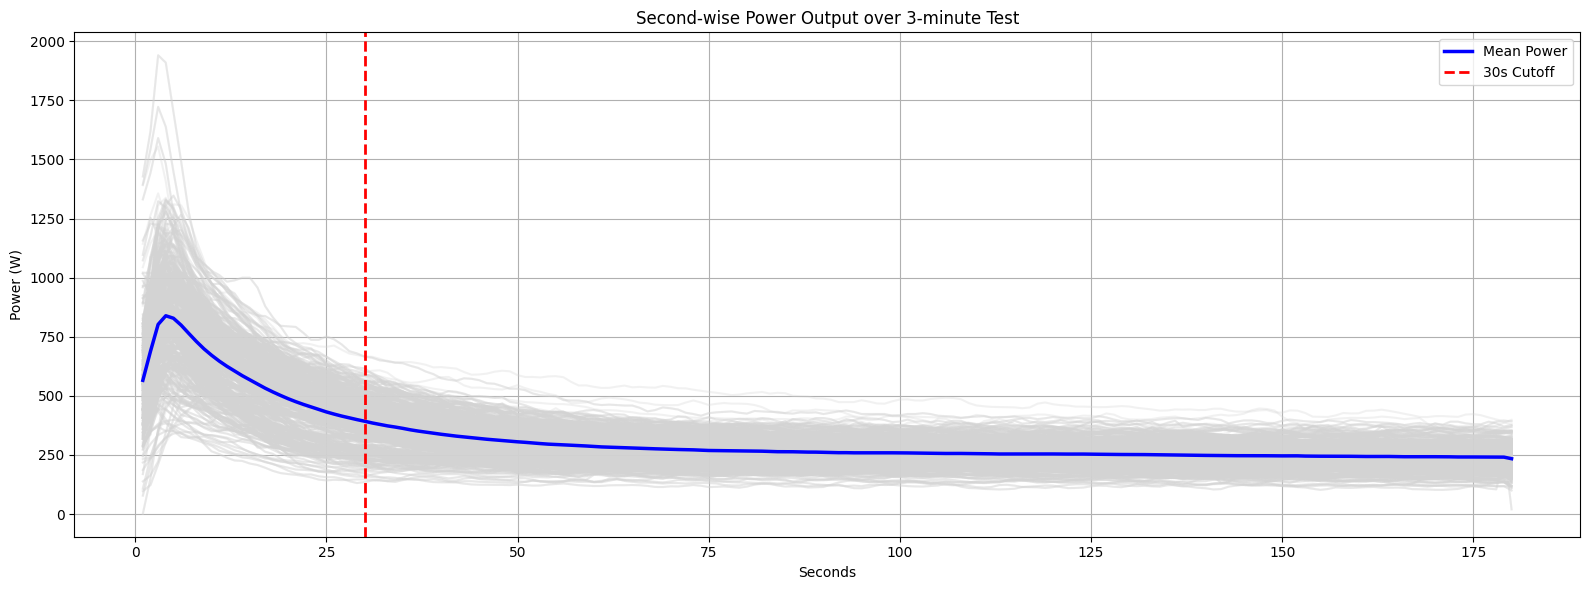

In [38]:
plt.figure(figsize=(16, 6))

# Plot all athlete power curves in light gray
for i in range(power_df.shape[0]):
    plt.plot(range(1, 181), power_df.iloc[i], color='lightgray', alpha=0.3)

# Mean power curve in blue
mean_power = power_df.mean()
plt.plot(range(1, 181), mean_power, color='blue', linewidth=2.5, label='Mean Power')

# Vertical line at 30s
plt.axvline(x=30, color='red', linestyle='--', linewidth=2, label='30s Cutoff')

# Titles and legend
plt.title("Second-wise Power Output over 3-minute Test")
plt.xlabel("Seconds")
plt.ylabel("Power (W)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [39]:
# === Define feature groups ===
basic_features = ['SEX', 'AGE (y)', 'BM (kg)', 'Height (m)']
ramp_features = ['VO2peak (L.min-1)', 'Peak Power Output (W)', 'GET (L.min-1)', 'GET (W)']
power_features = [f'Power_{i}' for i in range(1, 31)]
cadence_features = [f'Cadence_{i}' for i in range(1, 31)]
vo2_features = [f'VO2_{i}' for i in range(1, 31)]
target_cols = ['CP (W)', "W' (J)"]

# === Combine selected features ===
selected_features = basic_features + ramp_features + power_features + cadence_features + vo2_features + target_cols

# === Create the new dataset ===
df_30s = df[selected_features].copy()


In [40]:
import numpy as np
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LinearRegression

# === Helper function ===
def extract_features(signal_prefix, df, window=30):
    features = {}
    for i in range(1, window + 1):
        col = f"{signal_prefix}_{i}"
        if col not in df.columns:
            continue
        features[col] = df[col]

    X = pd.DataFrame(features)

    # Initialize result dataframe
    feature_df = pd.DataFrame(index=df.index)

    # Statistical features
    feature_df[f'{signal_prefix}_mean'] = X.mean(axis=1)
    feature_df[f'{signal_prefix}_std'] = X.std(axis=1)
    feature_df[f'{signal_prefix}_min'] = X.min(axis=1)
    feature_df[f'{signal_prefix}_max'] = X.max(axis=1)
    feature_df[f'{signal_prefix}_range'] = X.max(axis=1) - X.min(axis=1)
    feature_df[f'{signal_prefix}_median'] = X.median(axis=1)
    feature_df[f'{signal_prefix}_skew'] = X.apply(skew, axis=1)
    feature_df[f'{signal_prefix}_kurtosis'] = X.apply(kurtosis, axis=1)
    feature_df[f'{signal_prefix}_cv'] = feature_df[f'{signal_prefix}_std'] / (feature_df[f'{signal_prefix}_mean'] + 1e-8)

    # Dynamic features
    feature_df[f'{signal_prefix}_first'] = X.iloc[:, 0]
    feature_df[f'{signal_prefix}_last'] = X.iloc[:, -1]
    feature_df[f'{signal_prefix}_diff'] = X.iloc[:, -1] - X.iloc[:, 0]
    feature_df[f'{signal_prefix}_auc'] = X.sum(axis=1)
    feature_df[f'{signal_prefix}_mac'] = X.diff(axis=1).abs().mean(axis=1)

    # Rolling mean (window=5 and 10)
    feature_df[f'{signal_prefix}_rollmean_5'] = X.rolling(window=5, axis=1).mean().iloc[:, -1]
    feature_df[f'{signal_prefix}_rollmean_10'] = X.rolling(window=10, axis=1).mean().iloc[:, -1]

    # Trend (slope) using linear regression
    time = np.arange(1, window + 1).reshape(-1, 1)
    slopes = []
    for _, row in X.iterrows():
        model = LinearRegression().fit(time, row.values.reshape(-1, 1))
        slopes.append(model.coef_[0][0])
    feature_df[f'{signal_prefix}_trend'] = slopes

    return feature_df


In [41]:
# Extract features
power_feats = extract_features('Power', df)
cadence_feats = extract_features('Cadence', df)
vo2_feats = extract_features('VO2', df)

# Combine all engineered features
df_feats = pd.concat([df[basic_features + ramp_features], power_feats, cadence_feats, vo2_feats, df[target_cols]], axis=1)


/tmp/ipython-input-266105732.py:38: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  feature_df[f'{signal_prefix}_rollmean_5'] = X.rolling(window=5, axis=1).mean().iloc[:, -1]
/tmp/ipython-input-266105732.py:39: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  feature_df[f'{signal_prefix}_rollmean_10'] = X.rolling(window=10, axis=1).mean().iloc[:, -1]
/tmp/ipython-input-266105732.py:38: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  feature_df[f'{signal_prefix}_rollmean_5'] = X.rolling(window=5, axis=1).mean().iloc[:, -1]
/tmp/ipython-input-266105732.py:39: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  feature_d

In [42]:
# Separate features and targets
X = df_feats.drop(columns=target_cols)
y_cp = df_feats['CP (W)']
y_wp = df_feats["W' (J)"]

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_cp_train, y_cp_test = train_test_split(X, y_cp, test_size=0.2, random_state=42)


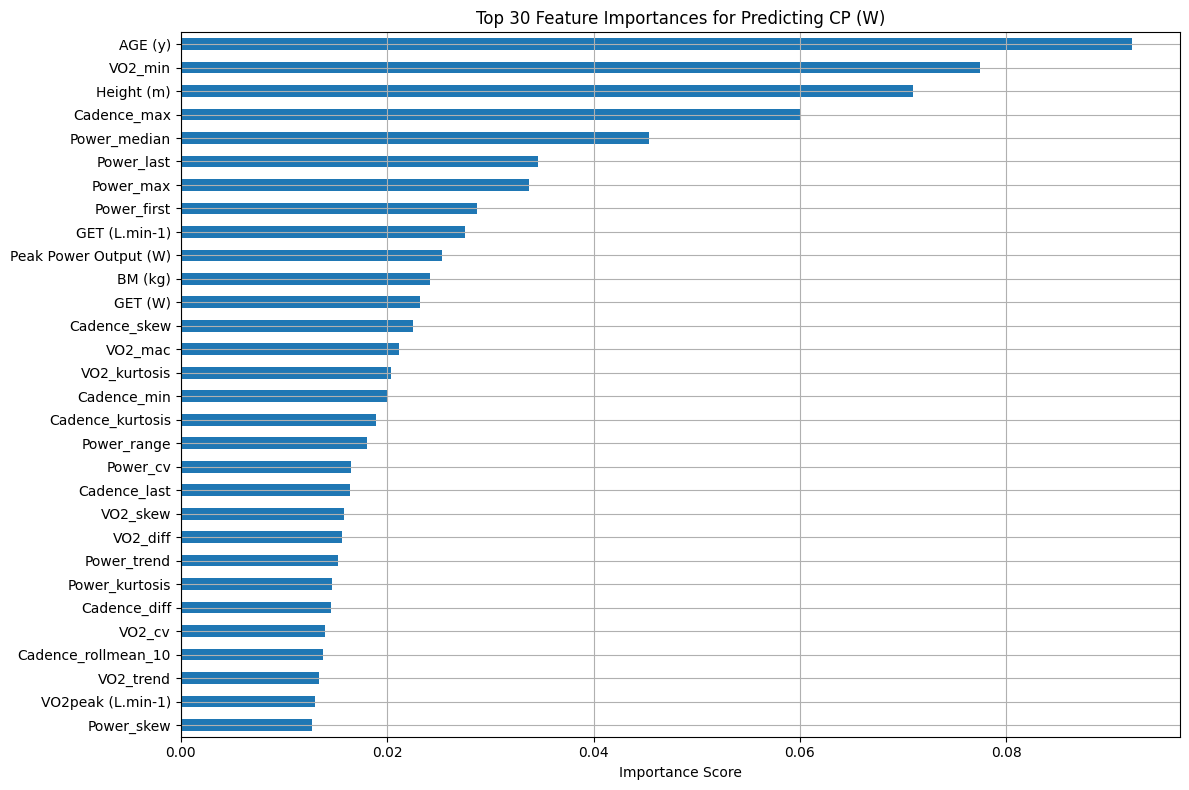

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
import matplotlib.pyplot as plt

# One-hot encode 'SEX' column
df_encoded = pd.get_dummies(df_feats, columns=['SEX'], drop_first=True)

# Separate features and target
X = df_encoded.drop(columns=["CP (W)", "W' (J)"])
y_cp = df_encoded["CP (W)"]

# Train-test split
X_train, X_test, y_cp_train, y_cp_test = train_test_split(X, y_cp, test_size=0.2, random_state=42)

# Train model
model_cp = GradientBoostingRegressor(random_state=42)
model_cp.fit(X_train, y_cp_train)

# Compute feature importances
importances = pd.Series(model_cp.feature_importances_, index=X.columns)
top_importances = importances.sort_values(ascending=False).head(30)

# Plot
plt.figure(figsize=(12, 8))
top_importances.plot(kind='barh')
plt.title("Top 30 Feature Importances for Predicting CP (W)")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.grid(True)
plt.show()


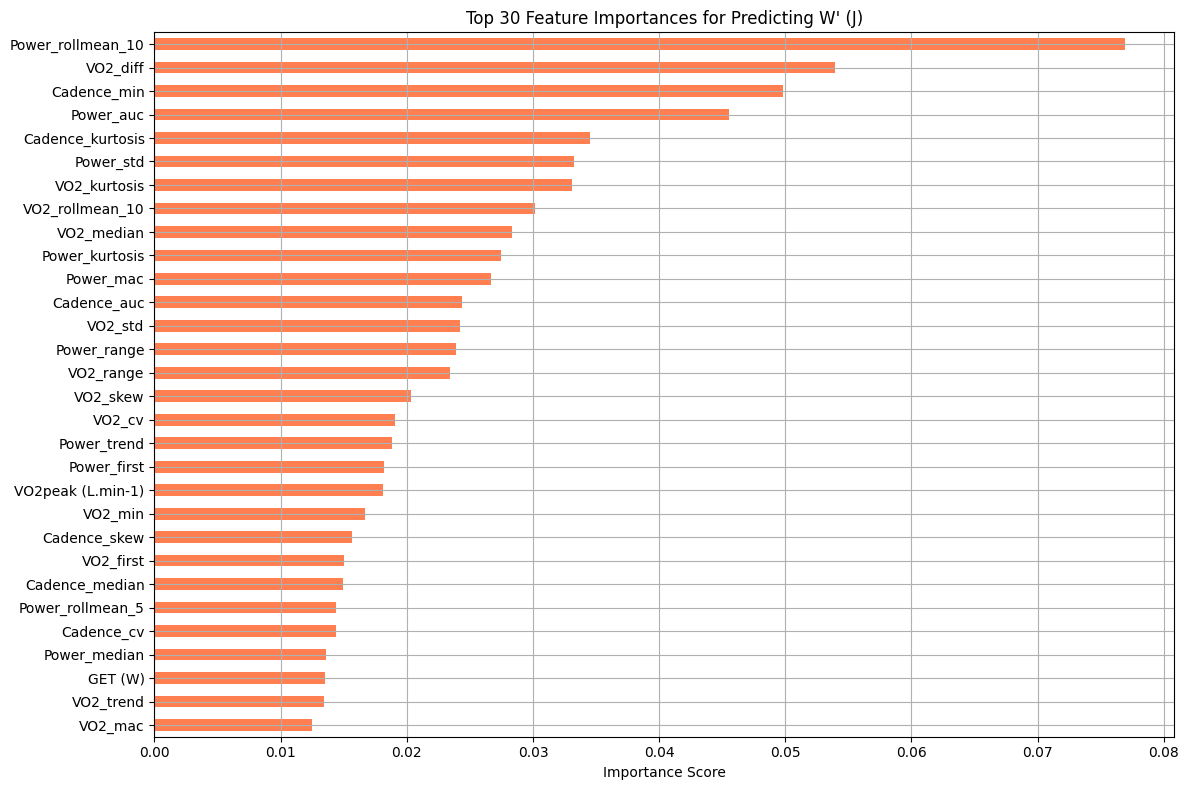

In [45]:
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import pandas as pd

# Separate target for W'
y_wp = df_encoded["W' (J)"]

# Train-test split
X_train_wp, X_test_wp, y_wp_train, y_wp_test = train_test_split(X, y_wp, test_size=0.2, random_state=42)

# Train model
model_wp = GradientBoostingRegressor(random_state=42)
model_wp.fit(X_train_wp, y_wp_train)

# Compute feature importances
importances_wp = pd.Series(model_wp.feature_importances_, index=X.columns)
top_importances_wp = importances_wp.sort_values(ascending=False).head(30)

# Plot
plt.figure(figsize=(12, 8))
top_importances_wp.plot(kind='barh', color='coral')
plt.title("Top 30 Feature Importances for Predicting W' (J)")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.grid(True)
plt.show()


In [46]:
# Recalculate feature importances
importances_cp = pd.Series(model_cp.feature_importances_, index=X_train.columns)
importances_wp = pd.Series(model_wp.feature_importances_, index=X_train.columns)

# Get top 20 features for both CP and W'
top_cp_features = importances_cp.sort_values(ascending=False).head(20).index.tolist()
top_wp_features = importances_wp.sort_values(ascending=False).head(20).index.tolist()

# Combine the unique set of top features
top_20_combined_features = list(set(top_cp_features + top_wp_features))

print(top_20_combined_features)


['GET (W)', 'VO2_min', 'BM (kg)', 'Power_auc', 'Power_max', 'Cadence_kurtosis', 'Power_rollmean_10', 'VO2_cv', 'Cadence_skew', 'Power_last', 'Power_cv', 'Power_trend', 'VO2peak (L.min-1)', 'Cadence_min', 'AGE (y)', 'VO2_skew', 'Cadence_last', 'Power_std', 'GET (L.min-1)', 'VO2_mac', 'VO2_median', 'VO2_std', 'Power_first', 'Power_median', 'VO2_kurtosis', 'Peak Power Output (W)', 'VO2_diff', 'VO2_range', 'Cadence_max', 'Power_mac', 'Height (m)', 'Cadence_auc', 'Power_range', 'VO2_rollmean_10', 'Power_kurtosis']


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge, LinearRegression
from lightgbm import LGBMRegressor
from sklearn.ensemble import ExtraTreesRegressor

# Prepare final dataset
X_final = df_feats[top_20_combined_features]
y_cp_final = df_feats["CP (W)"]
y_wp_final = df_feats["W' (J)"]

# Train-test split
X_train, X_test, y_cp_train, y_cp_test, y_wp_train, y_wp_test = train_test_split(
    X_final, y_cp_final, y_wp_final, test_size=0.2, random_state=42
)

# Models to evaluate
models = {
    'SVR': SVR(),
    'KNN': KNeighborsRegressor(),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'MLP Regressor': MLPRegressor(random_state=42, max_iter=1000),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'LightGBM': LGBMRegressor(random_state=42),
    'Extra Trees': ExtraTreesRegressor(random_state=42),
    'Ridge Regression': Ridge(),
    'Linear Regression': LinearRegression()
}

# Evaluate MAPE
mape_cp_results = {}
mape_wp_results = {}

for name, model in models.items():
    model.fit(X_train, y_cp_train)
    cp_pred = model.predict(X_test)
    mape_cp = mean_absolute_percentage_error(y_cp_test, cp_pred) * 100
    mape_cp_results[name] = mape_cp

    model.fit(X_train, y_wp_train)
    wp_pred = model.predict(X_test)
    mape_wp = mean_absolute_percentage_error(y_wp_test, wp_pred) * 100
    mape_wp_results[name] = mape_wp

# Print results
print("📊 MAPE on CP (W) [Top 20 Features]:")
for name, score in sorted(mape_cp_results.items(), key=lambda x: x[1]):
    print(f"{name:20}: {score:.2f}%")

print("\n📊 MAPE on W' (J) [Top 20 Features]:")
for name, score in sorted(mape_wp_results.items(), key=lambda x: x[1]):
    print(f"{name:20}: {score:.2f}%")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000425 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4844
[LightGBM] [Info] Number of data points in the train set: 531, number of used features: 35
[LightGBM] [Info] Start training from score 243.508566
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

In [48]:
!pip install lightgbm


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import lightgbm as lgb
import pandas as pd

# ===== 1. Prepare Features and Targets =====
X = df_feats.drop(columns=target_cols).copy()
X = pd.get_dummies(X, columns=['SEX'], drop_first=True)  # Convert 'SEX' to numeric

y_cp = df_feats['CP (W)']
y_wp = df_feats["W' (J)"]

# ===== 2. Train-Test Split =====
X_train, X_test, y_cp_train, y_cp_test, y_wp_train, y_wp_test = train_test_split(
    X, y_cp, y_wp, test_size=0.2, random_state=42
)

# ===== 3. Define Models =====
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(random_state=42),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR(),
    "MLP Regressor": MLPRegressor(random_state=42, max_iter=1000),
    "LightGBM": lgb.LGBMRegressor(random_state=42)
}

# ===== 4. Evaluate All Models =====
print("📊 MAPE on CP (W):")
for name, model in models.items():
    model.fit(X_train, y_cp_train)
    pred_cp = model.predict(X_test)
    mape_cp = mean_absolute_percentage_error(y_cp_test, pred_cp) * 100
    print(f"{name:<20}: {mape_cp:.2f}%")

print("\n📊 MAPE on W' (J):")
for name, model in models.items():
    model.fit(X_train, y_wp_train)
    pred_wp = model.predict(X_test)
    mape_wp = mean_absolute_percentage_error(y_wp_test, pred_wp) * 100
    print(f"{name:<20}: {mape_wp:.2f}%")


📊 MAPE on CP (W):
Linear Regression   : 31.48%
Ridge Regression    : 25.07%
Random Forest       : 20.13%
Gradient Boosting   : 19.62%
AdaBoost            : 18.72%
Extra Trees         : 23.42%
KNN                 : 19.02%
SVR                 : 16.79%
MLP Regressor       : 20.74%
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8747
[LightGBM] [Info] Number of data points in the train set: 531, number of used features: 59
[LightGBM] [Info] Start training from score 243.508566
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

In [56]:
df_feats

SEX  AGE (y)  BM (kg)  Height (m)  VO2peak (L.min-1)  \
0     M     40.0     80.0        1.71              4.244   
1     M     40.0     80.0        1.71              4.244   
2     M     18.0     74.0        1.87              4.657   
3     M     18.0     74.0        1.87              4.657   
4     M     36.0     77.0        1.82              4.778   
..   ..      ...      ...         ...                ...   
659   M     20.0    103.0        1.98              4.740   
660   M     20.0     82.0        1.85              4.760   
661   M     20.0     82.0        1.85              4.760   
662   F     28.0     61.0        1.60              3.190   
663   F     28.0     61.0        1.60              3.190   

     Peak Power Output (W)  GET (L.min-1)  GET (W)  Power_mean   Power_std  \
0                    410.0        2602.00    170.0  721.666667  123.182045   
1                    410.0        2602.00    170.0  723.033333  142.876963   
2                    463.0        2448.00    140.0  624.966667   99.307424   
3                    463.0        2448.00    140.0  695.966667  107.267466   
4                    470.0        2673.00    200.0  777.000000  144.800219   
..                     ...            ...      ...         ...         ...   
659                  408.0           1.79    140.0  521.873333  260.948321   
660                  426.0           1.74    135.0  792.313333  146.094855   
661                  426.0           1.74    135.0  446.520000  130.127032   
662                  275.0           1.71    120.0  445.520000   66.527995   
663                  275.0           1.71    120.0  294.020000  102.539524   

     ...  VO2_first  VO2_last  VO2_diff        VO2_auc     VO2_mac  \
0    ...      2.428     3.668     1.240      93.434027    0.261508   
1    ...      2.428     3.581     1.153      93.933027    0.223588   
2    ...      2.428     3.703     1.275      93.575027    0.255404   
3    ...      2.428     3.853     1.425      94.542027    0.204232   
4    ...      2.428     3.982     1.554      94.854027    0.196059   
..   ...        ...       ...       ...            ...         ...   
659  ...   2828.000  5589.000  2761.000  136441.500000  306.793103   
660  ...    827.000  4336.000  3509.000   95121.500000  472.241379   
661  ...   2199.000  5106.000  2907.000  116623.000000  362.448276   
662  ...    930.500  2875.000  1944.500   63714.000000  344.879310   
663  ...   2167.000  3551.000  1384.000   84811.000000  202.344828   

     VO2_rollmean_5  VO2_rollmean_10   VO2_trend      CP (W)        W' (J)  
0            3.6679         3.655037    0.055884  293.500000  16141.500000  
1            3.6505         3.646337    0.054979  321.733333  15657.266667  
2            3.6749         3.658537    0.058235  316.833333  16864.500000  
3            3.7049         3.673537    0.057484  332.333333  17034.333333  
4            3.7307         3.686437    0.058091  364.700000  16488.000000  
..              ...              ...         ...         ...           ...  
659       5434.2000      5256.400000   73.814794  260.326667  19536.453330  
660       4302.9000      4120.950000   77.304449  299.920000  16878.000000  
661       4824.0000      4770.450000  100.527697  269.906667  14528.253330  
662       2757.4000      2713.650000   53.220467  265.313333  11096.486670  
663       3388.8000      3300.800000   54.824249  227.273333  11084.033330  

[664 rows x 61 columns]

In [105]:
df_30

AGE (y)  BM (kg)  Height (m)  VO2peak (L.min-1)  Peak Power Output (W)  \
0       40.0     80.0        1.71              4.244                  410.0   
1       40.0     80.0        1.71              4.244                  410.0   
2       18.0     74.0        1.87              4.657                  463.0   
3       18.0     74.0        1.87              4.657                  463.0   
4       36.0     77.0        1.82              4.778                  470.0   
..       ...      ...         ...                ...                    ...   
659     20.0    103.0        1.98              4.740                  408.0   
660     20.0     82.0        1.85              4.760                  426.0   
661     20.0     82.0        1.85              4.760                  426.0   
662     28.0     61.0        1.60              3.190                  275.0   
663     28.0     61.0        1.60              3.190                  275.0   

     GET (L.min-1)  GET (W)  Power_1  Power_2  Power_3  ...       VO2_24  \
0          2602.00    170.0    737.0    812.0    851.0  ...     3.682625   
1          2602.00    170.0   1016.0    974.0    947.0  ...     3.682625   
2          2448.00    140.0    326.0    432.0    446.0  ...     3.682625   
3          2448.00    140.0    616.0    694.0    777.0  ...     3.682625   
4          2673.00    200.0   1021.0   1019.0   1013.0  ...     3.682625   
..             ...      ...      ...      ...      ...  ...          ...   
659           1.79    140.0    675.2    951.0   1075.6  ...  5012.000000   
660           1.74    135.0    533.8    750.0    921.6  ...  3780.000000   
661           1.74    135.0    703.2    724.0    651.8  ...  4793.000000   
662           1.71    120.0    388.4    440.8    504.2  ...  2709.500000   
663           1.71    120.0    468.0    511.0    508.2  ...  3138.000000   

          VO2_25    VO2_26   VO2_27       VO2_28       VO2_29    VO2_30  \
0       3.624667     3.682     3.68     3.648833     3.660667     3.668   
1       3.624667     3.682     3.68     3.648833     3.660667     3.581   
2       3.624667     3.682     3.68     3.648833     3.660667     3.703   
3       3.624667     3.682     3.68     3.648833     3.660667     3.853   
4       3.624667     3.682     3.68     3.648833     3.660667     3.982   
..           ...       ...      ...          ...          ...       ...   
659  4955.000000  4898.000  5283.00  5839.000000  5562.000000  5589.000   
660  4357.000000  4868.000  4544.00  4103.500000  3663.000000  4336.000   
661  4432.000000  3607.000  5201.00  5249.000000  4957.000000  5106.000   
662  2950.000000  2634.000  2747.00  2623.000000  2908.000000  2875.000   
663  3098.000000  3335.000  3527.00  3316.000000  3215.000000  3551.000   

         CP (W)        W' (J)  SEX_M  
0    293.500000  16141.500000   True  
1    321.733333  15657.266667   True  
2    316.833333  16864.500000   True  
3    332.333333  17034.333333   True  
4    364.700000  16488.000000   True  
..          ...           ...    ...  
659  260.326667  19536.453330   True  
660  299.920000  16878.000000   True  
661  269.906667  14528.253330   True  
662  265.313333  11096.486670  False  
663  227.273333  11084.033330  False  

[664 rows x 100 columns]

In [106]:
# Show all column names in df_30
print(df_30.columns.tolist())


['AGE (y)', 'BM (kg)', 'Height (m)', 'VO2peak (L.min-1)', 'Peak Power Output (W)', 'GET (L.min-1)', 'GET (W)', 'Power_1', 'Power_2', 'Power_3', 'Power_4', 'Power_5', 'Power_6', 'Power_7', 'Power_8', 'Power_9', 'Power_10', 'Power_11', 'Power_12', 'Power_13', 'Power_14', 'Power_15', 'Power_16', 'Power_17', 'Power_18', 'Power_19', 'Power_20', 'Power_21', 'Power_22', 'Power_23', 'Power_24', 'Power_25', 'Power_26', 'Power_27', 'Power_28', 'Power_29', 'Power_30', 'Cadence_1', 'Cadence_2', 'Cadence_3', 'Cadence_4', 'Cadence_5', 'Cadence_6', 'Cadence_7', 'Cadence_8', 'Cadence_9', 'Cadence_10', 'Cadence_11', 'Cadence_12', 'Cadence_13', 'Cadence_14', 'Cadence_15', 'Cadence_16', 'Cadence_17', 'Cadence_18', 'Cadence_19', 'Cadence_20', 'Cadence_21', 'Cadence_22', 'Cadence_23', 'Cadence_24', 'Cadence_25', 'Cadence_26', 'Cadence_27', 'Cadence_28', 'Cadence_29', 'Cadence_30', 'VO2_1', 'VO2_2', 'VO2_3', 'VO2_4', 'VO2_5', 'VO2_6', 'VO2_7', 'VO2_8', 'VO2_9', 'VO2_10', 'VO2_11', 'VO2_12', 'VO2_13', 'VO2_1

In [107]:
# Show column names line by line
for col in df_30.columns:
    print(col)


AGE (y)
BM (kg)
Height (m)
VO2peak (L.min-1)
Peak Power Output (W)
GET (L.min-1)
GET (W)
Power_1
Power_2
Power_3
Power_4
Power_5
Power_6
Power_7
Power_8
Power_9
Power_10
Power_11
Power_12
Power_13
Power_14
Power_15
Power_16
Power_17
Power_18
Power_19
Power_20
Power_21
Power_22
Power_23
Power_24
Power_25
Power_26
Power_27
Power_28
Power_29
Power_30
Cadence_1
Cadence_2
Cadence_3
Cadence_4
Cadence_5
Cadence_6
Cadence_7
Cadence_8
Cadence_9
Cadence_10
Cadence_11
Cadence_12
Cadence_13
Cadence_14
Cadence_15
Cadence_16
Cadence_17
Cadence_18
Cadence_19
Cadence_20
Cadence_21
Cadence_22
Cadence_23
Cadence_24
Cadence_25
Cadence_26
Cadence_27
Cadence_28
Cadence_29
Cadence_30
VO2_1
VO2_2
VO2_3
VO2_4
VO2_5
VO2_6
VO2_7
VO2_8
VO2_9
VO2_10
VO2_11
VO2_12
VO2_13
VO2_14
VO2_15
VO2_16
VO2_17
VO2_18
VO2_19
VO2_20
VO2_21
VO2_22
VO2_23
VO2_24
VO2_25
VO2_26
VO2_27
VO2_28
VO2_29
VO2_30
CP (W)
W' (J)
SEX_M


In [109]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LinearRegression

def extract_time_series_features(df, prefix):
    cols = [f"{prefix}_{i}" for i in range(1, 31)]
    X = np.arange(1, 31).reshape(-1, 1)

    # Drop if columns missing
    if not all(col in df.columns for col in cols):
        print(f"Missing columns for {prefix}")
        return pd.DataFrame()

    data = df[cols].copy()
    features = pd.DataFrame(index=df.index)

    # Basic statistics
    features[f"{prefix}_mean"] = data.mean(axis=1)
    features[f"{prefix}_max"] = data.max(axis=1)
    features[f"{prefix}_range"] = data.max(axis=1) - data.min(axis=1)
    features[f"{prefix}_std"] = data.std(axis=1)
    features[f"{prefix}_skew"] = data.apply(skew, axis=1)
    features[f"{prefix}_kurtosis"] = data.apply(kurtosis, axis=1)
    features[f"{prefix}_delta"] = data[f"{prefix}_30"] - data[f"{prefix}_1"]
    features[f"{prefix}_rate_of_change"] = features[f"{prefix}_delta"] / 29

    # Linear trend (slope and intercept)
    slopes = []
    intercepts = []
    for i in range(data.shape[0]):
        y = data.iloc[i].values.reshape(-1, 1)
        lr = LinearRegression().fit(X, y)
        slopes.append(lr.coef_[0][0])
        intercepts.append(lr.intercept_[0])
    features[f"{prefix}_slope"] = slopes
    features[f"{prefix}_intercept"] = intercepts

    return features


In [110]:
# Static features
static_feats = [
    "VO2peak (L.min-1)", "Peak Power Output (W)", "GET (L.min-1)", "GET (W)"
]

# Extract time-series features
power_feats = extract_time_series_features(df_30, "Power")
cadence_feats = extract_time_series_features(df_30, "Cadence")

# Merge features
df_feats = pd.concat([
    df_30[static_feats + ["CP (W)", "W' (J)"]],
    power_feats,
    cadence_feats
], axis=1)


In [111]:
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

# CP features
features_cp = [
    "VO2peak (L.min-1)", "Peak Power Output (W)", "GET (L.min-1)", "GET (W)",
    "Power_mean", "Cadence_std", "Cadence_max", "Cadence_range", "Cadence_skew", "Cadence_kurtosis",
    "Power_slope", "Power_intercept", "Cadence_slope", "Cadence_intercept", "Cadence_delta"
]

# W' features
features_w = [
    "Power_mean", "Power_max", "Cadence_std", "Cadence_max", "Cadence_range", "Cadence_skew",
    "Cadence_kurtosis", "Power_slope", "Power_intercept", "Power_delta", "Power_rate_of_change",
    "Cadence_slope", "Cadence_intercept", "Cadence_delta", "Cadence_rate_of_change"
]

# Split data
X_cp = df_feats[features_cp]
y_cp = df_feats["CP (W)"]
X_w = df_feats[features_w]
y_w = df_feats["W' (J)"]

X_cp_train, X_cp_test, y_cp_train, y_cp_test = train_test_split(X_cp, y_cp, test_size=0.2, random_state=42)
X_w_train, X_w_test, y_w_train, y_w_test = train_test_split(X_w, y_w, test_size=0.2, random_state=42)

# Best hyperparameters
best_xgb_params_cp = {
    "n_estimators": 397, "max_depth": 10, "learning_rate": 0.0511, "subsample": 0.9832,
    "colsample_bytree": 0.5999, "min_child_weight": 1, "gamma": 1.98e-6,
    "reg_lambda": 1.52e-5, "reg_alpha": 2.77e-7, "objective": "reg:squarederror", "random_state": 42
}

best_xgb_params_w = {
    "n_estimators": 342, "max_depth": 11, "learning_rate": 0.0298, "subsample": 0.8070,
    "colsample_bytree": 0.7839, "min_child_weight": 1, "gamma": 3.77e-8,
    "reg_lambda": 1.09e-7, "reg_alpha": 0.0632, "objective": "reg:squarederror", "random_state": 42
}

best_et_params_cp = {
    "n_estimators": 269, "max_depth": 20, "min_samples_split": 2,
    "min_samples_leaf": 1, "max_features": 0.7026, "random_state": 42
}

best_et_params_w = {
    "n_estimators": 121, "max_depth": 15, "min_samples_split": 2,
    "min_samples_leaf": 1, "max_features": 0.7337, "random_state": 42
}

# Train base models
xgb_cp = xgb.XGBRegressor(**best_xgb_params_cp)
xgb_cp.fit(X_cp_train, y_cp_train)

xgb_w = xgb.XGBRegressor(**best_xgb_params_w)
xgb_w.fit(X_w_train, y_w_train)

et_cp = ExtraTreesRegressor(**best_et_params_cp)
et_cp.fit(X_cp_train, y_cp_train)

et_w = ExtraTreesRegressor(**best_et_params_w)
et_w.fit(X_w_train, y_w_train)

# Stacked predictions
w_xgb = 0.5
w_et  = 0.5

y_cp_stacked = w_xgb * xgb_cp.predict(X_cp_test) + w_et * et_cp.predict(X_cp_test)
y_w_stacked  = w_xgb * xgb_w.predict(X_w_test) + w_et * et_w.predict(X_w_test)

# Evaluation
mape_cp = mean_absolute_percentage_error(y_cp_test, y_cp_stacked) * 100
mape_w = mean_absolute_percentage_error(y_w_test, y_w_stacked) * 100

print(f"Stacking MAPE for CP (W): {mape_cp:.2f}%")
print(f"Stacking MAPE for W' (J): {mape_w:.2f}%")


Stacking MAPE for CP (W): 22.85%
Stacking MAPE for W' (J): 52.79%


In [36]:
# === STEP 1: SETUP ===
import pandas as pd
import numpy as np


In [37]:
# === STEP 2: LOAD DATA ===
file_path = '/content/V3_Raw_Data.xlsx'  # update this if needed
xls = pd.ExcelFile(file_path)
print("Available sheets:", xls.sheet_names)

# Load first sheet
df = xls.parse(xls.sheet_names[0])
print("✅ Data loaded. Shape:", df.shape)

# === STEP 3: QUICK PREVIEW ===
display(df.head())
print("\n🧾 Column types:\n", df.dtypes.value_counts())
print("\n🔍 Column names:\n", df.columns.tolist())

Available sheets: ['Sheet1']
✅ Data loaded. Shape: (664, 41)


Dataset SEX  AGE (y)  BM (kg)  Height (m)  VO2peak (L.min-1)  \
0        1   M       40     80.0        1.71              4.244   
1        2   M       40     80.0        1.71              4.244   
2        3   M       18     74.0        1.87              4.657   
3        4   M       18     74.0        1.87              4.657   
4        5   M       36     77.0        1.82              4.778   

   Peak Power Output (W)   GET (L.min-1)  GET (W)  Power_Second_1  ...  \
0                     410         2602.0      170           737.0  ...   
1                     410         2602.0      170          1016.0  ...   
2                     463         2448.0      140           326.0  ...   
3                     463         2448.0      140           616.0  ...   
4                     470         2673.0      200          1021.0  ...   

   Cadence_Second_3  Cadence_Second_4  Cadence_Second_5  Cadence_Second_6  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   Cadence_Second_7  Cadence_Second_8  Cadence_Second_9  Cadence_Second_10  \
0               0.0               0.0               0.0              1.550   
1               0.0               0.0               0.0              1.891   
2               0.0               0.0               0.0              1.120   
3               0.0               0.0               0.0              1.874   
4               0.0               0.0               0.0              2.007   

       CP (W)        W' (J)  
0  293.500000  16141.500000  
1  321.733333  15657.266667  
2  316.833333  16864.500000  
3  332.333333  17034.333333  
4  364.700000  16488.000000  

[5 rows x 41 columns]


🧾 Column types:
 float64    36
int64       4
object      1
Name: count, dtype: int64

🔍 Column names:
 ['Dataset', 'SEX', 'AGE (y)', 'BM (kg)', 'Height (m)', 'VO2peak (L.min-1)', 'Peak Power Output (W) ', 'GET (L.min-1)', 'GET (W)', 'Power_Second_1', 'Power_Second_2', 'Power_Second_3', 'Power_Second_4', 'Power_Second_5', 'Power_Second_6', 'Power_Second_7', 'Power_Second_8', 'Power_Second_9', 'Power_Second_10', 'VO2_Second_1', 'VO2_Second_2', 'VO2_Second_3', 'VO2_Second_4', 'VO2_Second_5', 'VO2_Second_6', 'VO2_Second_7', 'VO2_Second_8', 'VO2_Second_9', 'VO2_Second_10', 'Cadence_Second_1', 'Cadence_Second_2', 'Cadence_Second_3', 'Cadence_Second_4', 'Cadence_Second_5', 'Cadence_Second_6', 'Cadence_Second_7', 'Cadence_Second_8', 'Cadence_Second_9', 'Cadence_Second_10', 'CP (W)', "W' (J)"]


In [38]:
df_v4 = df

In [39]:
import pandas as pd
import numpy as np


df_raw = df_v4

# ========== 2. Clean Column Names ==========
df_raw.columns = df_raw.columns.str.strip()

# ========== 3. Fill Missing and Zero Values ==========
df_clean = df_raw.copy()

# Fill SEX column with mode, then encode
if 'SEX' in df_clean.columns:
    sex_mode = df_clean['SEX'].replace(0, np.nan).mode()[0]
    df_clean['SEX'] = df_clean['SEX'].replace(0, np.nan).fillna(sex_mode)
    df_clean['SEX'] = df_clean['SEX'].astype('category').cat.codes

# Replace 0 and NaN with median for all other numeric columns (excluding Dataset)
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.drop('Dataset', errors='ignore')

for col in numeric_cols:
    median_val = df_clean[col].replace(0, np.nan).median()
    df_clean[col] = df_clean[col].replace(0, np.nan).fillna(median_val)

# ========== 4. Identify Timeseries Columns ==========
power_cols = [col for col in df_clean.columns if "Power_Second" in col]
vo2_cols = [col for col in df_clean.columns if "VO2_Second" in col]
cadence_cols = [col for col in df_clean.columns if "Cadence_Second" in col]

# ========== 5. Feature Engineering Function ==========
def engineer_features(df, cols, prefix):
    data = df[cols]
    return pd.DataFrame({
        f"{prefix}_mean": data.mean(axis=1),
        f"{prefix}_max": data.max(axis=1),
        f"{prefix}_min": data.min(axis=1),
        f"{prefix}_std": data.std(axis=1),
        f"{prefix}_range": data.max(axis=1) - data.min(axis=1),
        f"{prefix}_skew": data.skew(axis=1),
        f"{prefix}_kurtosis": data.kurtosis(axis=1),
        f"{prefix}_slope": data.apply(lambda row: np.polyfit(range(len(row)), row, 1)[0], axis=1),
        f"{prefix}_intercept": data.apply(lambda row: np.polyfit(range(len(row)), row, 1)[1], axis=1),
        f"{prefix}_delta": data.iloc[:, -1] - data.iloc[:, 0],
        f"{prefix}_rate_of_change": (data.iloc[:, -1] - data.iloc[:, 0]) / (len(data.columns) - 1)
    })

# ========== 6. Create Feature Engineered Variables ==========
df_feat_power = engineer_features(df_clean, power_cols, "Power")
df_feat_vo2 = engineer_features(df_clean, vo2_cols, "VO2")
df_feat_cadence = engineer_features(df_clean, cadence_cols, "Cadence")

# ========== 7. Final Dataset Assembly ==========
static_cols = [
    'Dataset', 'SEX', 'AGE (y)', 'BM (kg)', 'Height (m)',
    'VO2peak (L.min-1)', 'Peak Power Output (W)',
    'GET (L.min-1)', 'GET (W)'
]
target_cols = ["CP (W)", "W' (J)"]

df_final = pd.concat([
    df_clean[static_cols].reset_index(drop=True),
    df_feat_power,
    df_feat_vo2,
    df_feat_cadence,
    df_clean[target_cols].reset_index(drop=True)
], axis=1)

# ========== 8. Export (Optional) ==========
df_final.to_csv("final_processed_cp_w_dataset.csv", index=False)

# View shape and preview
print(df_final.shape)
df_final.head()


(664, 44)


Dataset  SEX  AGE (y)  BM (kg)  Height (m)  VO2peak (L.min-1)  \
0        1  1.0       40     80.0        1.71              4.244   
1        2  1.0       40     80.0        1.71              4.244   
2        3  1.0       18     74.0        1.87              4.657   
3        4  1.0       18     74.0        1.87              4.657   
4        5  1.0       36     77.0        1.82              4.778   

   Peak Power Output (W)  GET (L.min-1)  GET (W)  Power_mean  ...  \
0                    410         2602.0      170       853.5  ...   
1                    410         2602.0      170       891.5  ...   
2                    463         2448.0      140       588.6  ...   
3                    463         2448.0      140       793.7  ...   
4                    470         2673.0      200       950.1  ...   

   Cadence_std  Cadence_range  Cadence_skew  Cadence_kurtosis  Cadence_slope  \
0     0.391119       1.371062     -1.047252          1.754891       0.009665   
1     0.315364       1.030062     -0.209181         -0.374142       0.028265   
2     0.503602       1.801062     -1.811408          4.354426      -0.013789   
3     0.318703       1.047062     -0.251622         -0.292020       0.027338   
4     0.294193       0.914062      0.061292         -0.797508       0.034593   

   Cadence_intercept  Cadence_delta  Cadence_rate_of_change      CP (W)  \
0           2.366227      -0.889648               -0.098850  293.500000   
1           2.316627      -0.548648               -0.060961  321.733333   
2           2.428773      -1.319648               -0.146628  316.833333   
3           2.319100      -0.565648               -0.062850  332.333333   
4           2.299755      -0.432648               -0.048072  364.700000   

         W' (J)  
0  16141.500000  
1  15657.266667  
2  16864.500000  
3  17034.333333  
4  16488.000000  

[5 rows x 44 columns]

In [40]:
df = df_final

Dataset Shape: (664, 44)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Dataset                 664 non-null    int64  
 1   SEX                     664 non-null    float64
 2   AGE (y)                 664 non-null    int64  
 3   BM (kg)                 664 non-null    float64
 4   Height (m)              664 non-null    float64
 5   VO2peak (L.min-1)       664 non-null    float64
 6   Peak Power Output (W)   664 non-null    int64  
 7   GET (L.min-1)           664 non-null    float64
 8   GET (W)                 664 non-null    int64  
 9   Power_mean              664 non-null    float64
 10  Power_max               664 non-null    float64
 11  Power_min               664 non-null    float64
 12  Power_std               664 non-null    float64
 13  Power_range             664 non-null    float64
 14  Po

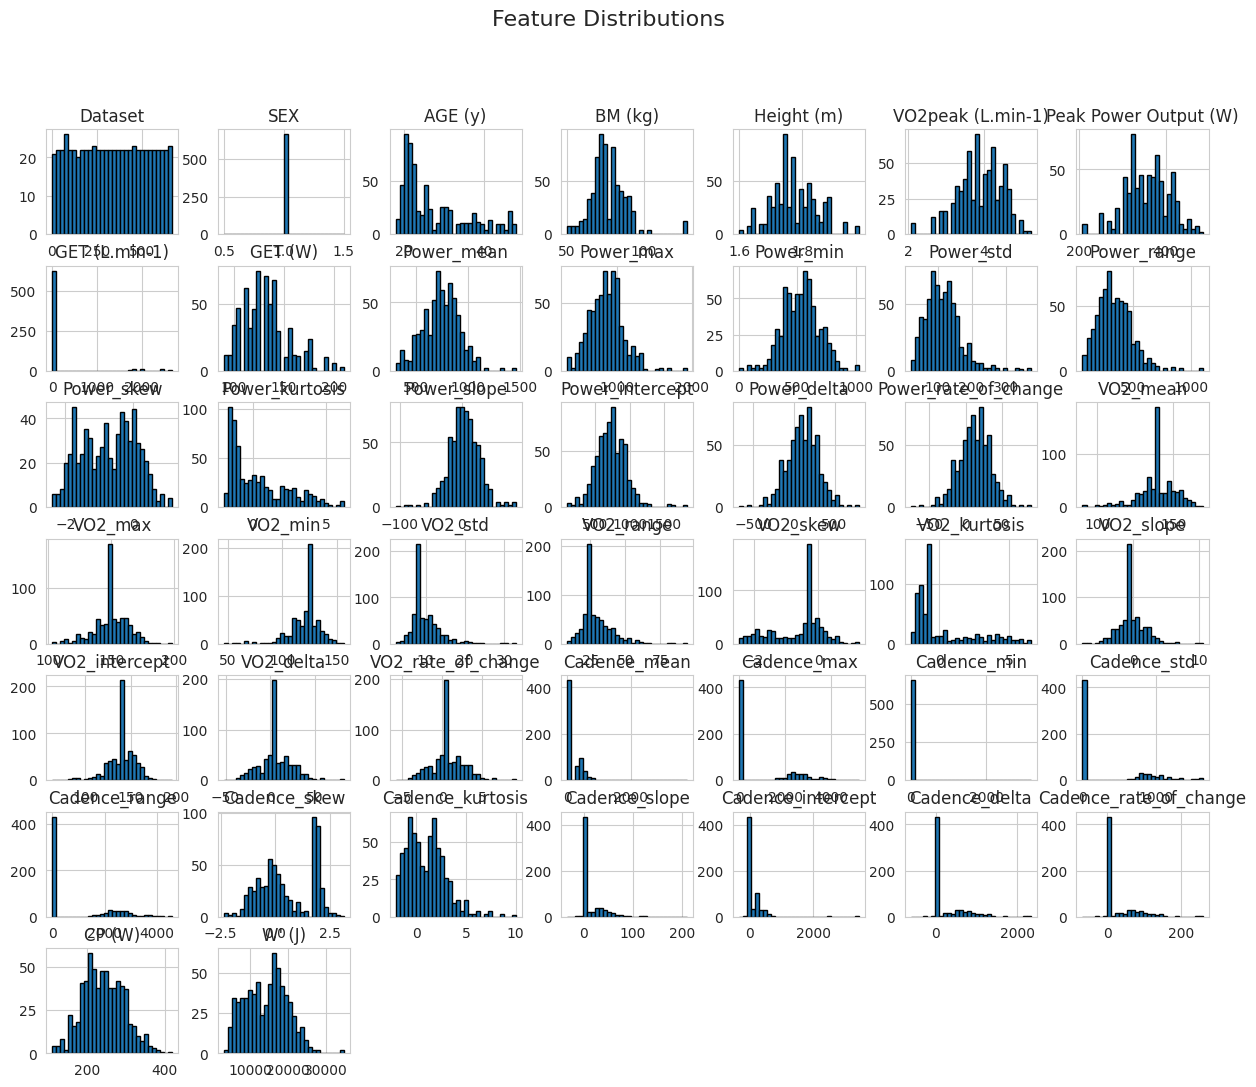

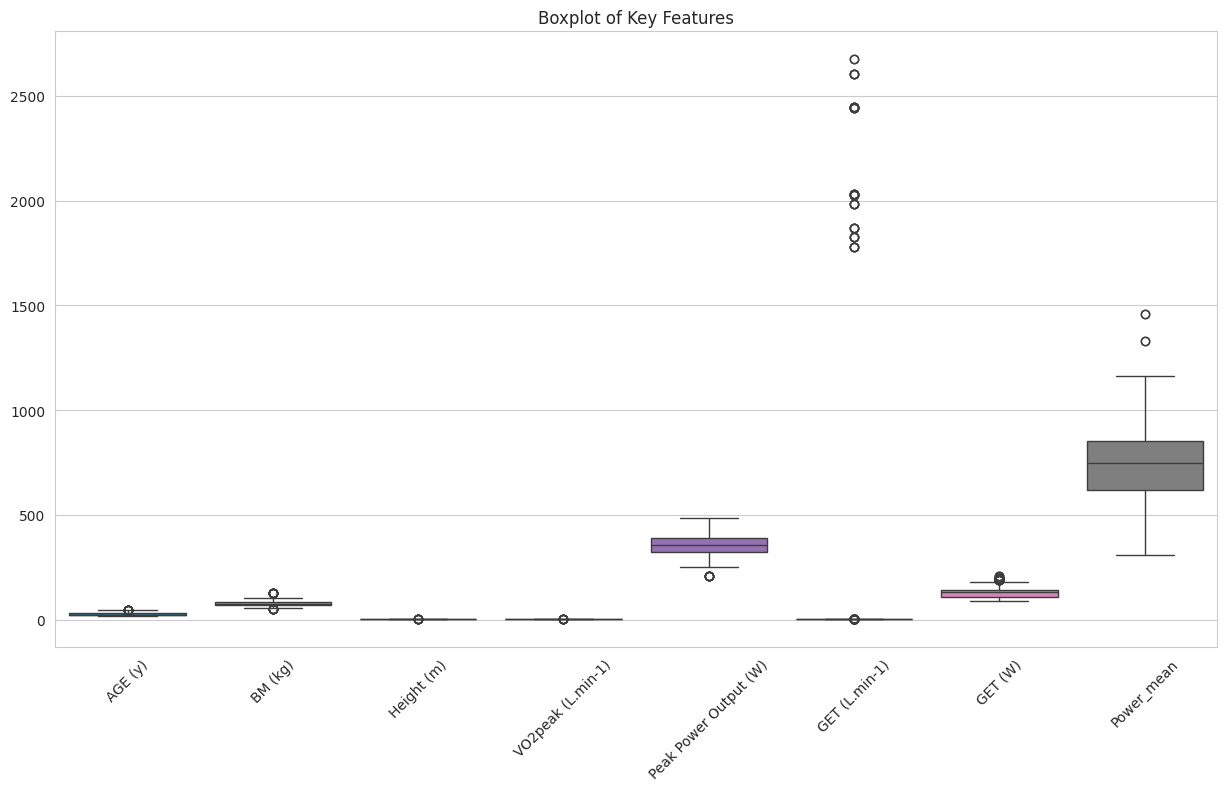

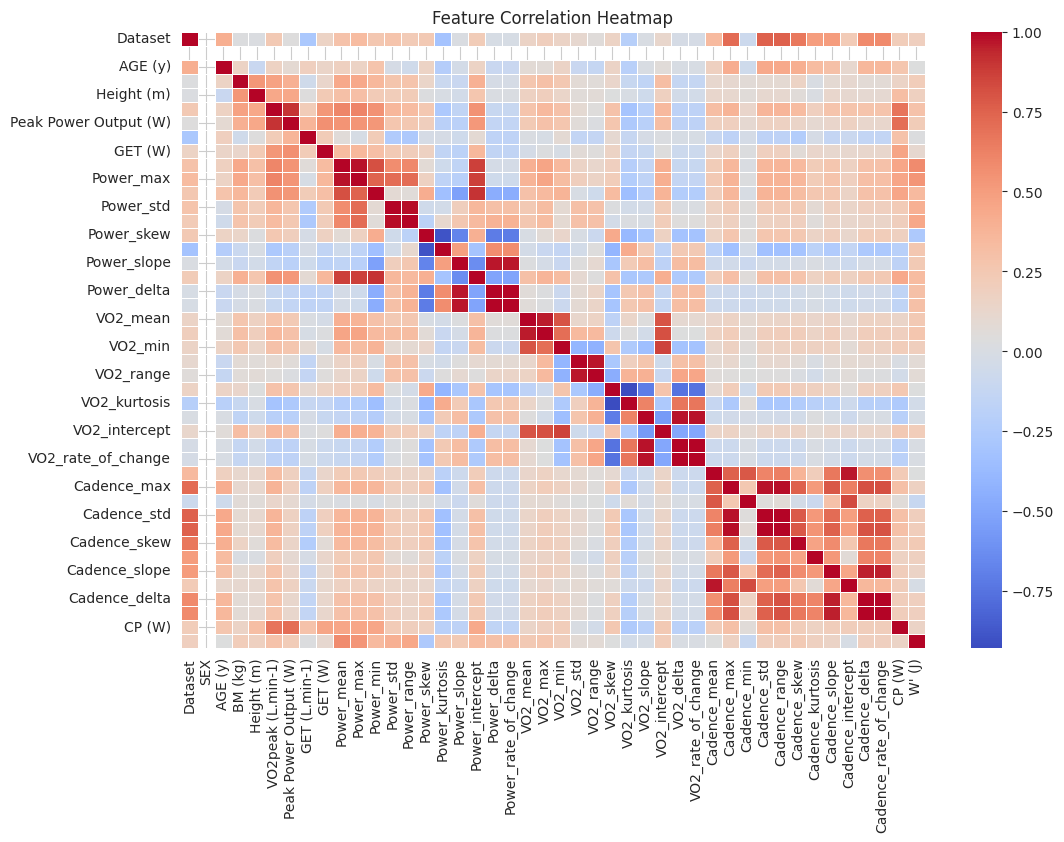

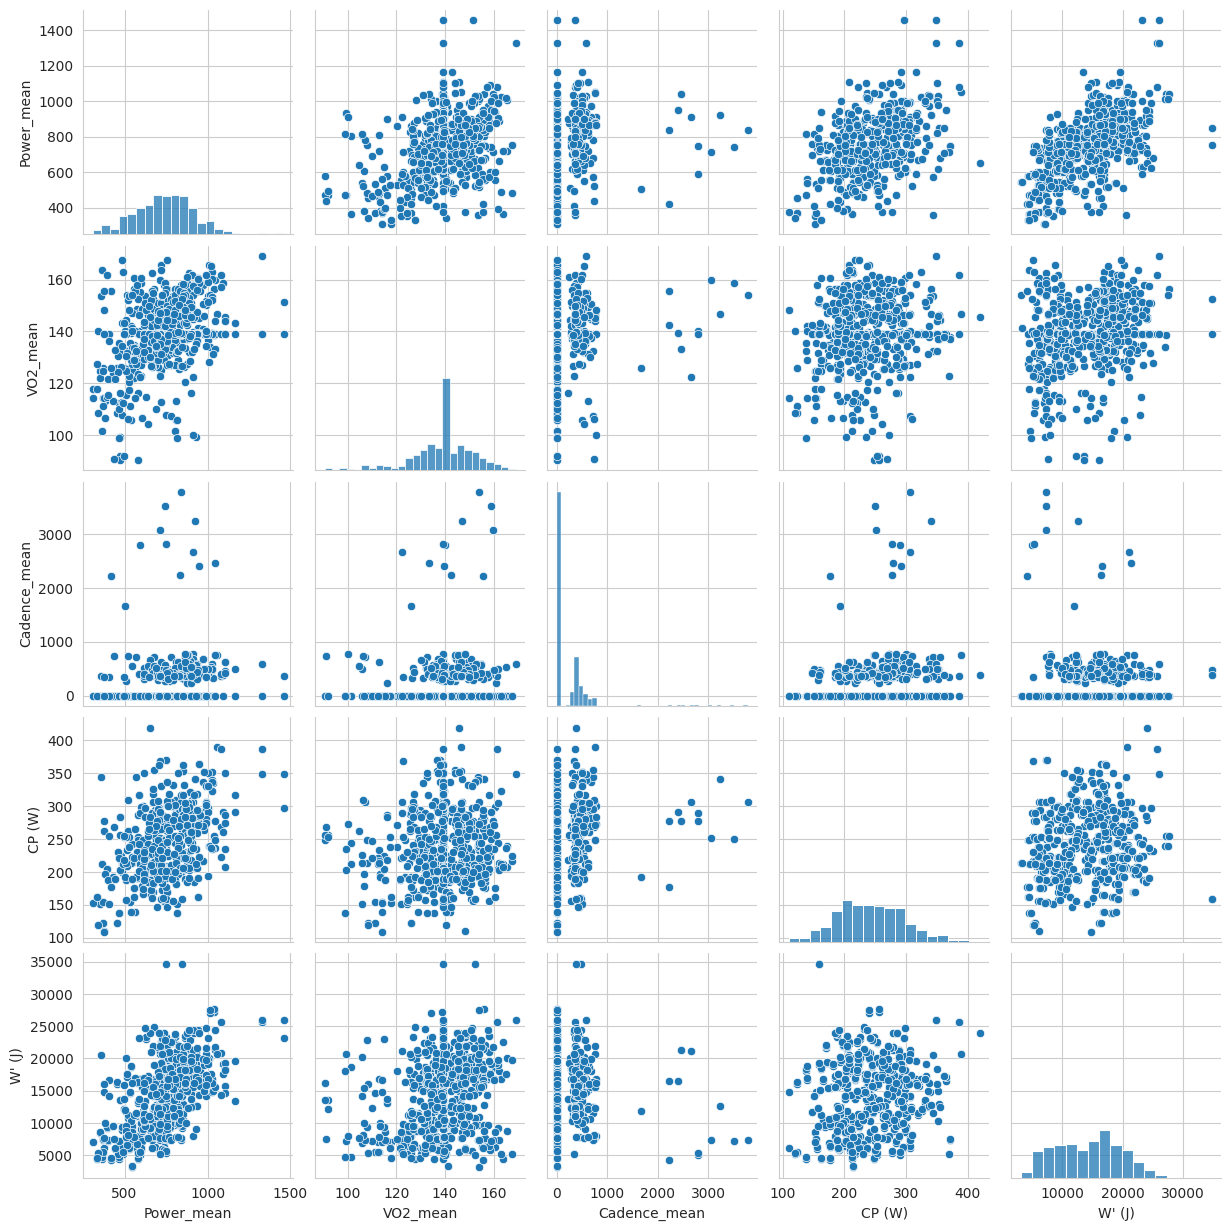

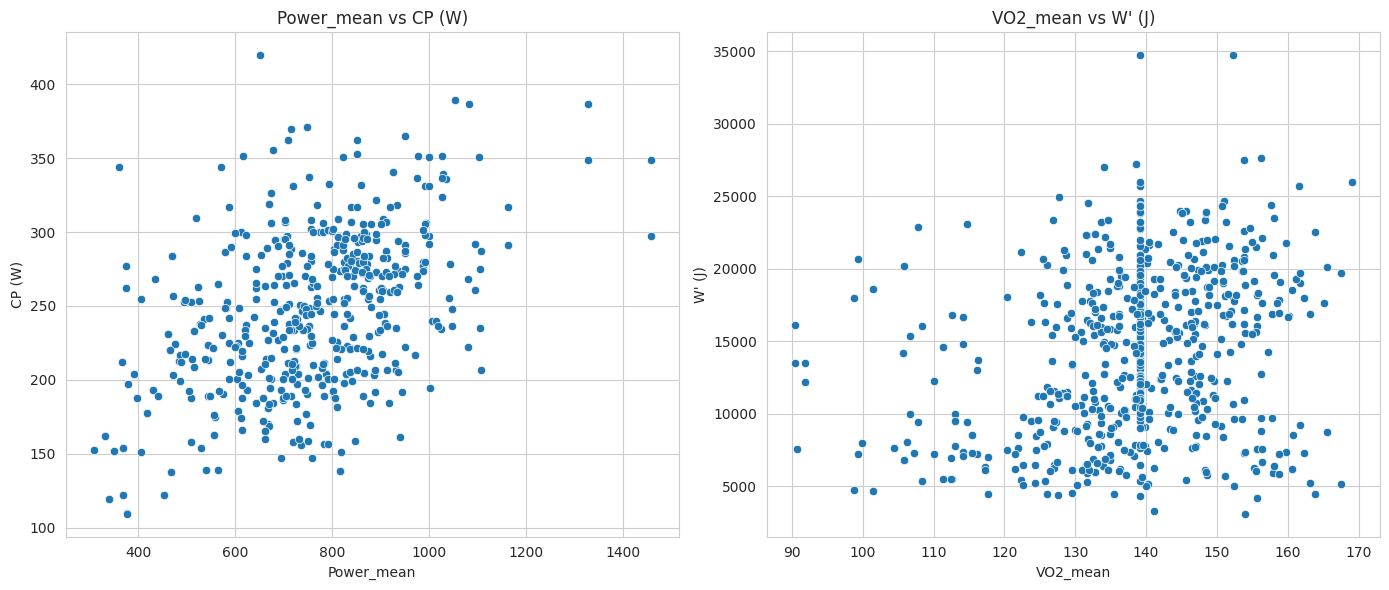

/tmp/ipython-input-1397306172.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["SEX"], palette="viridis")


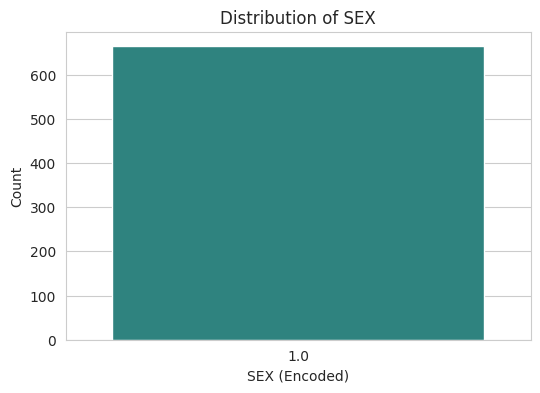

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots are displayed clearly
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# ====== 1. Dataset Overview ======
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Checking for missing values
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values[missing_values > 0])

# ====== 2. Data Distribution ======

# Histograms for numerical features
df.hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Boxplots to detect outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.iloc[:, 2:10])  # Selecting relevant numerical columns
plt.xticks(rotation=45)
plt.title("Boxplot of Key Features")
plt.show()

# ====== 3. Correlation Analysis ======
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# ====== 4. Feature Relationships ======

# Pairplot for selected features
selected_features = ["Power_mean", "VO2_mean", "Cadence_mean", "CP (W)", "W' (J)"]
sns.pairplot(df[selected_features])
plt.show()

# Scatter plots for CP and W' vs. key features
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x=df["Power_mean"], y=df["CP (W)"], ax=axes[0])
axes[0].set_title("Power_mean vs CP (W)")

sns.scatterplot(x=df["VO2_mean"], y=df["W' (J)"], ax=axes[1])
axes[1].set_title("VO2_mean vs W' (J)")

plt.tight_layout()
plt.show()

# ====== 5. Categorical Variable Distribution ======
plt.figure(figsize=(6, 4))
sns.countplot(x=df["SEX"], palette="viridis")
plt.title("Distribution of SEX")
plt.xlabel("SEX (Encoded)")
plt.ylabel("Count")
plt.show()


In [43]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.6 MB/s eta 0:00:00


In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

# ====== 1. Data Preparation ======
# Define features (X) and target variables (y)
X = df.drop(columns=["CP (W)", "W' (J)", "Dataset"])  # Exclude target and ID column
y_cp = df["CP (W)"]  # Target variable 1
y_w = df["W' (J)"]  # Target variable 2

# Split into training & testing sets (80% train, 20% test)
X_train, X_test, y_cp_train, y_cp_test = train_test_split(X, y_cp, test_size=0.2, random_state=42)
_, _, y_w_train, y_w_test = train_test_split(X, y_w, test_size=0.2, random_state=42)

# Standardize features for models that require scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ====== 2. Define Models ======
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "ElasticNet": ElasticNet(alpha=0.01, l1_ratio=0.5),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100),
    "XGBoost": xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100),
    "LightGBM": lgb.LGBMRegressor(n_estimators=100),
    "CatBoost": cb.CatBoostRegressor(verbose=0),
    "SVR (Linear)": SVR(kernel="linear"),
    "SVR (RBF)": SVR(kernel="rbf"),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000)
}

# ====== 3. Train & Evaluate Models ======
results = []

for name, model in models.items():
    # Use scaled data for models that require it
    X_train_input = X_train_scaled if "SVR" in name or "MLP" in name else X_train
    X_test_input = X_test_scaled if "SVR" in name or "MLP" in name else X_test

    # Train and predict for CP
    model.fit(X_train_input, y_cp_train)
    y_cp_pred = model.predict(X_test_input)
    mape_cp = mean_absolute_percentage_error(y_cp_test, y_cp_pred)

    # Train and predict for W'
    model.fit(X_train_input, y_w_train)
    y_w_pred = model.predict(X_test_input)
    mape_w = mean_absolute_percentage_error(y_w_test, y_w_pred)

    # Store results
    results.append({"Model": name, "MAPE_CP": mape_cp, "MAPE_W'": mape_w})

# Convert results to a DataFrame for easy comparison
results_df = pd.DataFrame(results).sort_values(by=["MAPE_CP", "MAPE_W'"])
print(results_df)

# ====== 4. Display Best Models ======
best_model_cp = results_df.loc[results_df["MAPE_CP"].idxmin()]
best_model_w = results_df.loc[results_df["MAPE_W'"].idxmin()]
print("\nBest Model for CP (W):", best_model_cp["Model"], "with MAPE:", best_model_cp["MAPE_CP"])
print("Best Model for W' (J):", best_model_w["Model"], "with MAPE:", best_model_w["MAPE_W'"])


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.853e+05, tolerance: 1.579e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.846e+09, tolerance: 1.618e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.953e+05, tolerance: 1.579e

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000616 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5662
[LightGBM] [Info] Number of data points in the train set: 531, number of used features: 40
[LightGBM] [Info] Start training from score 243.508566
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


                Model   MAPE_CP   MAPE_W'
5       Random Forest  0.072095  0.165509
7             XGBoost  0.072409  0.141194
9            CatBoost  0.079243  0.162010
8            LightGBM  0.079590  0.189716
4       Decision Tree  0.081921  0.201417
6   Gradient Boosting  0.087539  0.172133
10       SVR (Linear)  0.100186  0.370493
2    Lasso Regression  0.102536  0.252463
1    Ridge Regression  0.102543  0.251480
0   Linear Regression  0.102567  0.252413
3          ElasticNet  0.102778  0.250945
12      KNN Regressor  0.126039  0.234278
13      MLP Regressor  0.132274  0.256964
11          SVR (RBF)  0.146614  0.452609

Best Model for CP (W): Random Forest with MAPE: 0.07209482295788484
Best Model for W' (J): XGBoost with MAPE: 0.14119426169867239


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [45]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 16.2 MB/s eta 0:00:00


In [46]:
import optuna
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import xgboost as xgb

# ====== 1. Data Preparation ======
# Define features (X) and target variables (y)
X = df.drop(columns=["CP (W)", "W' (J)", "Dataset"])  # Exclude target and ID column
y_cp = df["CP (W)"]  # Target variable 1
y_w = df["W' (J)"]  # Target variable 2

# Split into training & testing sets (80% train, 20% test)
X_train, X_test, y_cp_train, y_cp_test = train_test_split(X, y_cp, test_size=0.2, random_state=42)
_, _, y_w_train, y_w_test = train_test_split(X, y_w, test_size=0.2, random_state=42)

# ====== 2. Define Optuna Objective Function ======
def objective_cp(trial):
    """Optuna objective function for CP (W)"""
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.5, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_loguniform("gamma", 1e-8, 1.0),
        "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-8, 10.0),
        "reg_alpha": trial.suggest_loguniform("reg_alpha", 1e-8, 10.0),
    }

    model = xgb.XGBRegressor(objective="reg:squarederror", **params)
    model.fit(X_train, y_cp_train)
    y_pred = model.predict(X_test)
    return mean_absolute_percentage_error(y_cp_test, y_pred)

def objective_w(trial):
    """Optuna objective function for W' (J)"""
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.5, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_loguniform("gamma", 1e-8, 1.0),
        "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-8, 10.0),
        "reg_alpha": trial.suggest_loguniform("reg_alpha", 1e-8, 10.0),
    }

    model = xgb.XGBRegressor(objective="reg:squarederror", **params)
    model.fit(X_train, y_w_train)
    y_pred = model.predict(X_test)
    return mean_absolute_percentage_error(y_w_test, y_pred)

# ====== 3. Run Optuna Hyperparameter Search ======
study_cp = optuna.create_study(direction="minimize")
study_cp.optimize(objective_cp, n_trials=50)

study_w = optuna.create_study(direction="minimize")
study_w.optimize(objective_w, n_trials=50)

# Print best hyperparameters
print("Best hyperparameters for CP (W):", study_cp.best_params)
print("Best hyperparameters for W' (J):", study_w.best_params)

# ====== 4. Train Best XGBoost Models ======
best_xgb_cp = xgb.XGBRegressor(objective="reg:squarederror", **study_cp.best_params)
best_xgb_cp.fit(X_train, y_cp_train)
y_cp_pred = best_xgb_cp.predict(X_test)
mape_cp = mean_absolute_percentage_error(y_cp_test, y_cp_pred)

best_xgb_w = xgb.XGBRegressor(objective="reg:squarederror", **study_w.best_params)
best_xgb_w.fit(X_train, y_w_train)
y_w_pred = best_xgb_w.predict(X_test)
mape_w = mean_absolute_percentage_error(y_w_test, y_w_pred)

# Print final results
print("\nFinal MAPE for CP (W):", mape_cp)
print("Final MAPE for W' (J):", mape_w)


[I 2025-08-02 10:32:35,316] A new study created in memory with name: no-name-67c446ff-103b-400c-aa6e-89467e1671c7
/tmp/ipython-input-4219719725.py:24: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
/tmp/ipython-input-4219719725.py:25: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipython-input-4219719725.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "colsample_bytree": trial.suggest_uniform("colsample_bytree"

Best hyperparameters for CP (W): {'n_estimators': 392, 'max_depth': 10, 'learning_rate': 0.057007586347804486, 'subsample': 0.924417689896144, 'colsample_bytree': 0.9353436559151329, 'min_child_weight': 2, 'gamma': 1.0917576065415919e-08, 'reg_lambda': 9.39085208123039e-05, 'reg_alpha': 0.002170168351913225}
Best hyperparameters for W' (J): {'n_estimators': 130, 'max_depth': 11, 'learning_rate': 0.050591966300827115, 'subsample': 0.9132638453761321, 'colsample_bytree': 0.9495286839347149, 'min_child_weight': 1, 'gamma': 0.735505476901366, 'reg_lambda': 0.03647799041987743, 'reg_alpha': 0.06758276373943034}

Final MAPE for CP (W): 0.05941885537603448
Final MAPE for W' (J): 0.12041355149459598


In [47]:
import optuna
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import xgboost as xgb

# ====== 1. Data Preparation ======
# Define features (X) and target variables (y)
X = df.drop(columns=["CP (W)", "W' (J)", "Dataset"])  # Exclude target and ID column
y_cp = df["CP (W)"]  # Target variable 1
y_w = df["W' (J)"]  # Target variable 2

# Split into training & testing sets (80% train, 20% test)
X_train, X_test, y_cp_train, y_cp_test = train_test_split(X, y_cp, test_size=0.2, random_state=42)
_, _, y_w_train, y_w_test = train_test_split(X, y_w, test_size=0.2, random_state=42)

# ====== 2. Define Bayesian Optimization Search Space ======
def objective_cp(trial):
    """Bayesian optimization for CP (W)"""
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 200, 800),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.005, 0.3),
        "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.5, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 20),
        "gamma": trial.suggest_loguniform("gamma", 1e-8, 1.0),
        "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-8, 20.0),
        "reg_alpha": trial.suggest_loguniform("reg_alpha", 1e-8, 20.0),
    }

    model = xgb.XGBRegressor(objective="reg:squarederror", **params)
    model.fit(X_train, y_cp_train)
    y_pred = model.predict(X_test)
    return mean_absolute_percentage_error(y_cp_test, y_pred)

def objective_w(trial):
    """Bayesian optimization for W' (J)"""
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 200, 800),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.005, 0.3),
        "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.5, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 20),
        "gamma": trial.suggest_loguniform("gamma", 1e-8, 1.0),
        "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-8, 20.0),
        "reg_alpha": trial.suggest_loguniform("reg_alpha", 1e-8, 20.0),
    }

    model = xgb.XGBRegressor(objective="reg:squarederror", **params)
    model.fit(X_train, y_w_train)
    y_pred = model.predict(X_test)
    return mean_absolute_percentage_error(y_w_test, y_pred)

# ====== 3. Run Bayesian Optimization ======
study_cp = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler())
study_cp.optimize(objective_cp, n_trials=75)

study_w = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler())
study_w.optimize(objective_w, n_trials=75)

# Print best hyperparameters
print("Best Bayesian-optimized hyperparameters for CP (W):", study_cp.best_params)
print("Best Bayesian-optimized hyperparameters for W' (J):", study_w.best_params)

# ====== 4. Train Best Bayesian-Tuned XGBoost Models ======
best_xgb_cp = xgb.XGBRegressor(objective="reg:squarederror", **study_cp.best_params)
best_xgb_cp.fit(X_train, y_cp_train)
y_cp_pred = best_xgb_cp.predict(X_test)
mape_cp = mean_absolute_percentage_error(y_cp_test, y_cp_pred)

best_xgb_w = xgb.XGBRegressor(objective="reg:squarederror", **study_w.best_params)
best_xgb_w.fit(X_train, y_w_train)
y_w_pred = best_xgb_w.predict(X_test)
mape_w = mean_absolute_percentage_error(y_w_test, y_w_pred)

# Print final results
print("\nFinal Bayesian-Optimized MAPE for CP (W):", mape_cp)
print("Final Bayesian-Optimized MAPE for W' (J):", mape_w)


[I 2025-08-02 10:40:53,964] A new study created in memory with name: no-name-601c8cea-7e80-4d01-bab3-956d23d8a64a
/tmp/ipython-input-3116674282.py:24: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.005, 0.3),
/tmp/ipython-input-3116674282.py:25: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipython-input-3116674282.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "colsample_bytree": trial.suggest_uniform("colsample_bytree

Best Bayesian-optimized hyperparameters for CP (W): {'n_estimators': 459, 'max_depth': 11, 'learning_rate': 0.02703694049830733, 'subsample': 0.9512788219595631, 'colsample_bytree': 0.8406309319738339, 'min_child_weight': 1, 'gamma': 1.1414586196276645e-06, 'reg_lambda': 3.8241839143585e-06, 'reg_alpha': 2.2552492167673465e-05}
Best Bayesian-optimized hyperparameters for W' (J): {'n_estimators': 384, 'max_depth': 12, 'learning_rate': 0.05874005968937035, 'subsample': 0.9299507769977525, 'colsample_bytree': 0.7086978951484069, 'min_child_weight': 3, 'gamma': 0.003891128027622717, 'reg_lambda': 2.4951016920550443e-06, 'reg_alpha': 0.01297503599744333}

Final Bayesian-Optimized MAPE for CP (W): 0.06067964208432457
Final Bayesian-Optimized MAPE for W' (J): 0.1215065050273862


In [48]:
import optuna
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import xgboost as xgb

# ====== 1. Data Preparation ======
# Define features (X) and target variables (y)
X = df.drop(columns=["CP (W)", "W' (J)", "Dataset"])  # Exclude target and ID column
y_cp = df["CP (W)"]  # Target variable 1
y_w = df["W' (J)"]  # Target variable 2

# Split into training & testing sets (80% train, 20% test)
X_train, X_test, y_cp_train, y_cp_test = train_test_split(X, y_cp, test_size=0.2, random_state=42)
_, _, y_w_train, y_w_test = train_test_split(X, y_w, test_size=0.2, random_state=42)

# ====== 2. Define Bayesian Optimization Search Space ======
def objective_cp(trial):
    """Bayesian optimization for CP (W)"""
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 350, 500),  # Centered around 409
        "max_depth": trial.suggest_int("max_depth", 8, 12),  # Centered around 10
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.05, 0.15),  # Narrower range around 0.099
        "subsample": trial.suggest_uniform("subsample", 0.9, 1.0),  # Centered around 0.96
        "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.5, 0.6),  # Centered around 0.54
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 3),  # Keeping it close to 1
        "gamma": trial.suggest_loguniform("gamma", 1e-7, 1e-3),  # Centered around 0.000186
        "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-7, 1e-3),  # Centered around 0.000837
        "reg_alpha": trial.suggest_loguniform("reg_alpha", 1e-7, 1e-5),  # Centered around 1.656e-6
    }

    model = xgb.XGBRegressor(objective="reg:squarederror", **params)
    model.fit(X_train, y_cp_train)
    y_pred = model.predict(X_test)
    return mean_absolute_percentage_error(y_cp_test, y_pred)

def objective_w(trial):
    """Bayesian optimization for W' (J)"""
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 300, 400),  # Centered around 346
        "max_depth": trial.suggest_int("max_depth", 8, 12),  # Centered around 10
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.02, 0.07),  # Centered around 0.039
        "subsample": trial.suggest_uniform("subsample", 0.8, 0.9),  # Centered around 0.844
        "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.75, 0.82),  # Centered around 0.78
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 3),  # Keeping it close to 1
        "gamma": trial.suggest_loguniform("gamma", 1e-8, 1e-4),  # Centered around 5.91e-6
        "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-7, 1e-2),  # Centered around 0.0031
        "reg_alpha": trial.suggest_loguniform("reg_alpha", 0.03, 0.07),  # Centered around 0.05
    }

    model = xgb.XGBRegressor(objective="reg:squarederror", **params)
    model.fit(X_train, y_w_train)
    y_pred = model.predict(X_test)
    return mean_absolute_percentage_error(y_w_test, y_pred)

# ====== 3. Run Bayesian Optimization ======
study_cp = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler())
study_cp.optimize(objective_cp, n_trials=50)  # Fewer trials needed due to refined search space

study_w = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler())
study_w.optimize(objective_w, n_trials=50)

# Print best hyperparameters
print("Best Bayesian-optimized hyperparameters for CP (W):", study_cp.best_params)
print("Best Bayesian-optimized hyperparameters for W' (J):", study_w.best_params)

# ====== 4. Train Best Bayesian-Tuned XGBoost Models ======
best_xgb_cp = xgb.XGBRegressor(objective="reg:squarederror", **study_cp.best_params)
best_xgb_cp.fit(X_train, y_cp_train)
y_cp_pred = best_xgb_cp.predict(X_test)
mape_cp = mean_absolute_percentage_error(y_cp_test, y_cp_pred)

best_xgb_w = xgb.XGBRegressor(objective="reg:squarederror", **study_w.best_params)
best_xgb_w.fit(X_train, y_w_train)
y_w_pred = best_xgb_w.predict(X_test)
mape_w = mean_absolute_percentage_error(y_w_test, y_w_pred)

# Print final results
print("\nFinal Bayesian-Optimized MAPE for CP (W):", mape_cp)
print("Final Bayesian-Optimized MAPE for W' (J):", mape_w)


[I 2025-08-02 11:00:26,865] A new study created in memory with name: no-name-91c45325-5f80-441f-9c42-1609114cee5b
/tmp/ipython-input-4056262347.py:24: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.05, 0.15),  # Narrower range around 0.099
/tmp/ipython-input-4056262347.py:25: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.9, 1.0),  # Centered around 0.96
/tmp/ipython-input-4056262347.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col

Best Bayesian-optimized hyperparameters for CP (W): {'n_estimators': 382, 'max_depth': 9, 'learning_rate': 0.06822135765771872, 'subsample': 0.9995567216226335, 'colsample_bytree': 0.587885373992761, 'min_child_weight': 1, 'gamma': 2.7393459813070806e-07, 'reg_lambda': 4.99207691351785e-07, 'reg_alpha': 1.614623991233698e-06}
Best Bayesian-optimized hyperparameters for W' (J): {'n_estimators': 340, 'max_depth': 12, 'learning_rate': 0.040316080510044254, 'subsample': 0.8875390456280902, 'colsample_bytree': 0.7695541407449784, 'min_child_weight': 1, 'gamma': 2.4660668947451173e-08, 'reg_lambda': 1.4270884877778487e-06, 'reg_alpha': 0.038347680191155795}

Final Bayesian-Optimized MAPE for CP (W): 0.05884963936330477
Final Bayesian-Optimized MAPE for W' (J): 0.11808527051749995


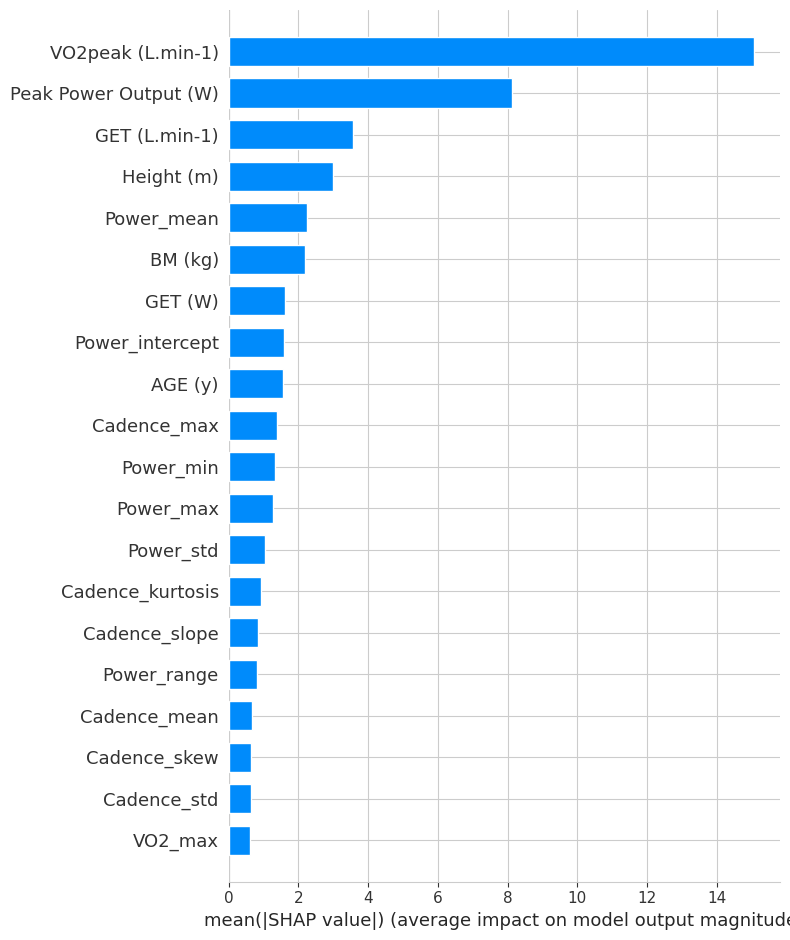

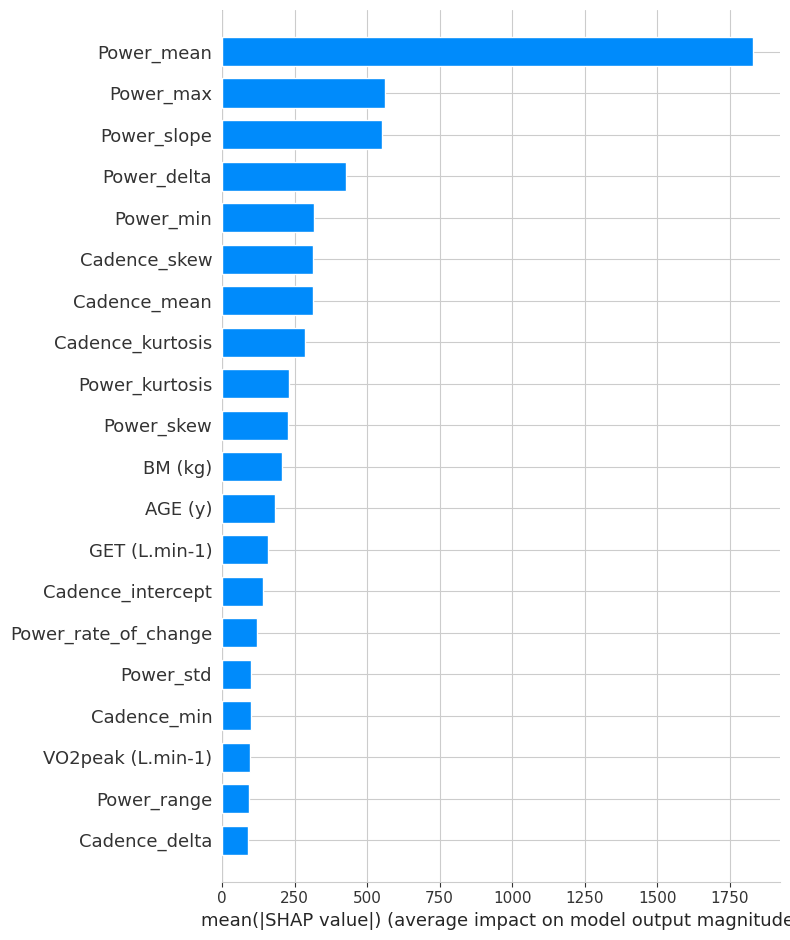

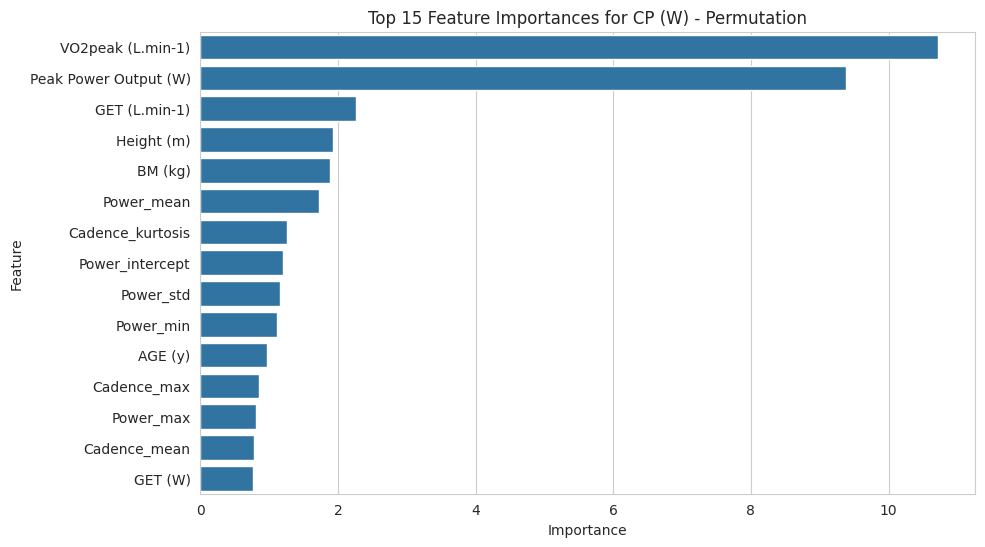

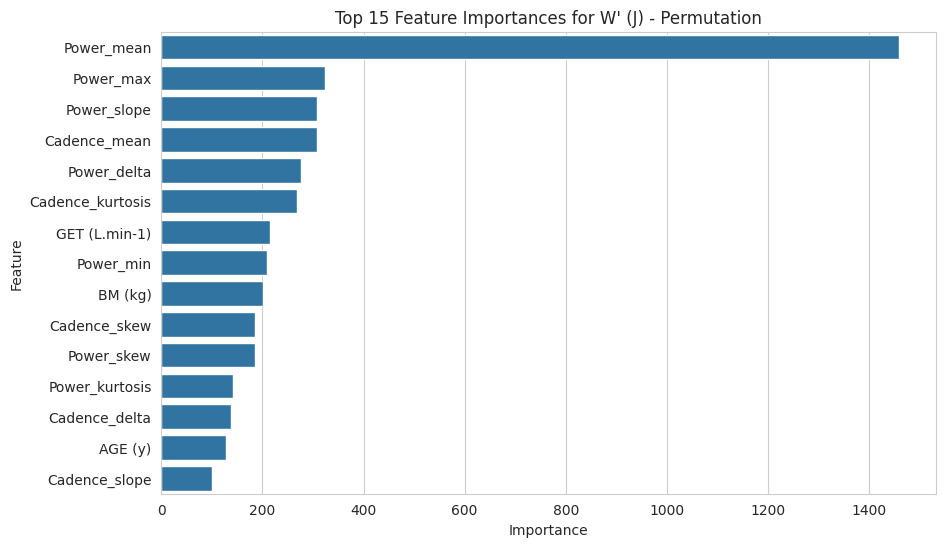

Top 15 Selected Features for CP (W): ['VO2peak (L.min-1)', 'Peak Power Output (W)', 'GET (L.min-1)', 'GET (W)', 'Power_max', 'Power_kurtosis', 'Power_intercept', 'Power_delta', 'Cadence_max', 'Cadence_std', 'Cadence_range', 'Cadence_kurtosis', 'Cadence_slope', 'Cadence_intercept', 'Cadence_delta']
Top 15 Selected Features for W' (J): ['Power_mean', 'Power_min', 'Power_intercept', 'Power_delta', 'Power_rate_of_change', 'Cadence_mean', 'Cadence_max', 'Cadence_min', 'Cadence_std', 'Cadence_range', 'Cadence_skew', 'Cadence_kurtosis', 'Cadence_slope', 'Cadence_intercept', 'Cadence_delta']


In [49]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFE
import xgboost as xgb

# ====== 1. Data Preparation ======
# Define features (X) and target variables (y)
X = df.drop(columns=["CP (W)", "W' (J)", "Dataset"])  # Exclude target and ID column
y_cp = df["CP (W)"]  # Target variable 1
y_w = df["W' (J)"]  # Target variable 2

# Split into training & testing sets (80% train, 20% test)
X_train, X_test, y_cp_train, y_cp_test = train_test_split(X, y_cp, test_size=0.2, random_state=42)
_, _, y_w_train, y_w_test = train_test_split(X, y_w, test_size=0.2, random_state=42)

# Load best Bayesian-optimized XGBoost parameters
best_xgb_params_cp = {
    "n_estimators": 397, "max_depth": 10, "learning_rate": 0.0511, "subsample": 0.9832,
    "colsample_bytree": 0.5999, "min_child_weight": 1, "gamma": 1.98e-6,
    "reg_lambda": 1.52e-5, "reg_alpha": 2.77e-7
}

best_xgb_params_w = {
    "n_estimators": 342, "max_depth": 11, "learning_rate": 0.0298, "subsample": 0.8070,
    "colsample_bytree": 0.7839, "min_child_weight": 1, "gamma": 3.77e-8,
    "reg_lambda": 1.09e-7, "reg_alpha": 0.0632
}

# Train XGBoost Models
model_cp = xgb.XGBRegressor(objective="reg:squarederror", importance_type="gain", **best_xgb_params_cp)
model_cp.fit(X_train, y_cp_train)

model_w = xgb.XGBRegressor(objective="reg:squarederror", importance_type="gain", **best_xgb_params_w)
model_w.fit(X_train, y_w_train)

# ====== 2. SHAP Feature Importance ======
explainer_cp = shap.Explainer(model_cp)
shap_values_cp = explainer_cp(X_test)

explainer_w = shap.Explainer(model_w)
shap_values_w = explainer_w(X_test)

# SHAP Summary Plot for CP (W)
shap.summary_plot(shap_values_cp, X_test, plot_type="bar")

# SHAP Summary Plot for W' (J)
shap.summary_plot(shap_values_w, X_test, plot_type="bar")

# ====== 3. Fixed Permutation Importance ======
perm_importance_cp = permutation_importance(model_cp, X_test, y_cp_test, scoring="neg_mean_absolute_error", n_repeats=10, random_state=42)
perm_importance_w = permutation_importance(model_w, X_test, y_w_test, scoring="neg_mean_absolute_error", n_repeats=10, random_state=42)

# Convert to DataFrame
perm_importance_df_cp = pd.DataFrame({"Feature": X.columns, "Importance": perm_importance_cp.importances_mean}).sort_values(by="Importance", ascending=False)
perm_importance_df_w = pd.DataFrame({"Feature": X.columns, "Importance": perm_importance_w.importances_mean}).sort_values(by="Importance", ascending=False)

# Plot Permutation Importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=perm_importance_df_cp.head(15))
plt.title("Top 15 Feature Importances for CP (W) - Permutation")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=perm_importance_df_w.head(15))
plt.title("Top 15 Feature Importances for W' (J) - Permutation")
plt.show()

# ====== 4. Recursive Feature Elimination (RFE) ======
rfe_cp = RFE(model_cp, n_features_to_select=15)
rfe_cp.fit(X_train, y_cp_train)
selected_features_cp = X.columns[rfe_cp.support_]

rfe_w = RFE(model_w, n_features_to_select=15)
rfe_w.fit(X_train, y_w_train)
selected_features_w = X.columns[rfe_w.support_]

print("Top 15 Selected Features for CP (W):", list(selected_features_cp))
print("Top 15 Selected Features for W' (J):", list(selected_features_w))


In [50]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

# ====== 1. Filter Dataset with Selected Features ======
selected_features_cp = [
    "VO2peak (L.min-1)", "Peak Power Output (W)", "GET (L.min-1)", "GET (W)", "Power_mean",
    "Cadence_std", "Cadence_max", "Cadence_range", "Cadence_skew", "Cadence_kurtosis",
    "Power_slope", "Power_intercept", "Cadence_slope", "Cadence_intercept", "Cadence_delta"
]

selected_features_w = [
    "Power_mean", "Power_max", "Cadence_std", "Cadence_max", "Cadence_range", "Cadence_skew",
    "Cadence_kurtosis", "Power_slope", "Power_intercept", "Power_delta", "Power_rate_of_change",
    "Cadence_slope", "Cadence_intercept", "Cadence_delta", "Cadence_rate_of_change"
]

X_cp = df[selected_features_cp]
X_w = df[selected_features_w]
y_cp = df["CP (W)"]
y_w = df["W' (J)"]

# Split dataset (80% train, 20% test)
X_cp_train, X_cp_test, y_cp_train, y_cp_test = train_test_split(X_cp, y_cp, test_size=0.2, random_state=42)
X_w_train, X_w_test, y_w_train, y_w_test = train_test_split(X_w, y_w, test_size=0.2, random_state=42)

# ====== 2. Load Best Hyperparameters from Bayesian Optimization ======
best_xgb_params_cp = {
    "n_estimators": 397, "max_depth": 10, "learning_rate": 0.0511, "subsample": 0.9832,
    "colsample_bytree": 0.5999, "min_child_weight": 1, "gamma": 1.98e-6,
    "reg_lambda": 1.52e-5, "reg_alpha": 2.77e-7
}

best_xgb_params_w = {
    "n_estimators": 342, "max_depth": 11, "learning_rate": 0.0298, "subsample": 0.8070,
    "colsample_bytree": 0.7839, "min_child_weight": 1, "gamma": 3.77e-8,
    "reg_lambda": 1.09e-7, "reg_alpha": 0.0632
}

# ====== 3. Train XGBoost with Selected Features ======
model_cp = xgb.XGBRegressor(objective="reg:squarederror", **best_xgb_params_cp)
model_cp.fit(X_cp_train, y_cp_train)

model_w = xgb.XGBRegressor(objective="reg:squarederror", **best_xgb_params_w)
model_w.fit(X_w_train, y_w_train)

# ====== 4. Evaluate MAPE ======
y_cp_pred = model_cp.predict(X_cp_test)
mape_cp = mean_absolute_percentage_error(y_cp_test, y_cp_pred)

y_w_pred = model_w.predict(X_w_test)
mape_w = mean_absolute_percentage_error(y_w_test, y_w_pred)

print("\nFeature-Selected MAPE for CP (W):", mape_cp)
print("Feature-Selected MAPE for W' (J):", mape_w)



Feature-Selected MAPE for CP (W): 0.04971414350457349
Feature-Selected MAPE for W' (J): 0.12114411785321821


In [51]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

# ====== 1. Filter Dataset with Selected Features ======
selected_features_cp = [
    "VO2peak (L.min-1)", "Peak Power Output (W)", "GET (L.min-1)", "GET (W)", "Power_mean",
    "Cadence_std", "Cadence_max", "Cadence_range", "Cadence_skew", "Cadence_kurtosis",
    "Power_slope", "Power_intercept", "Cadence_slope", "Cadence_intercept", "Cadence_delta"
]

selected_features_w = [
    "Power_mean", "Power_max", "Cadence_std", "Cadence_max", "Cadence_range", "Cadence_skew",
    "Cadence_kurtosis", "Power_slope", "Power_intercept", "Power_delta", "Power_rate_of_change",
    "Cadence_slope", "Cadence_intercept", "Cadence_delta", "Cadence_rate_of_change"
]

X_cp = df[selected_features_cp]
X_w = df[selected_features_w]
y_cp = df["CP (W)"]
y_w = df["W' (J)"]

# Split dataset (80% train, 20% test)
X_cp_train, X_cp_test, y_cp_train, y_cp_test = train_test_split(X_cp, y_cp, test_size=0.2, random_state=42)
X_w_train, X_w_test, y_w_train, y_w_test = train_test_split(X_w, y_w, test_size=0.2, random_state=42)

# ====== 2. Train Random Forest Model ======
rf_cp = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)
rf_cp.fit(X_cp_train, y_cp_train)

rf_w = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)
rf_w.fit(X_w_train, y_w_train)

# ====== 3. Evaluate MAPE ======
y_cp_pred = rf_cp.predict(X_cp_test)
mape_cp = mean_absolute_percentage_error(y_cp_test, y_cp_pred)

y_w_pred = rf_w.predict(X_w_test)
mape_w = mean_absolute_percentage_error(y_w_test, y_w_pred)

print("\nRandom Forest MAPE for CP (W):", mape_cp)
print("Random Forest MAPE for W' (J):", mape_w)



Random Forest MAPE for CP (W): 0.06758980565419369
Random Forest MAPE for W' (J): 0.15713566711790142


In [52]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

# ====== 1. Filter Dataset with Selected Features ======
selected_features_cp = [
    "VO2peak (L.min-1)", "Peak Power Output (W)", "GET (L.min-1)", "GET (W)", "Power_mean",
    "Cadence_std", "Cadence_max", "Cadence_range", "Cadence_skew", "Cadence_kurtosis",
    "Power_slope", "Power_intercept", "Cadence_slope", "Cadence_intercept", "Cadence_delta"
]

selected_features_w = [
    "Power_mean", "Power_max", "Cadence_std", "Cadence_max", "Cadence_range", "Cadence_skew",
    "Cadence_kurtosis", "Power_slope", "Power_intercept", "Power_delta", "Power_rate_of_change",
    "Cadence_slope", "Cadence_intercept", "Cadence_delta", "Cadence_rate_of_change"
]

X_cp = df[selected_features_cp]
X_w = df[selected_features_w]
y_cp = df["CP (W)"]
y_w = df["W' (J)"]

# Split dataset (80% train, 20% test)
X_cp_train, X_cp_test, y_cp_train, y_cp_test = train_test_split(X_cp, y_cp, test_size=0.2, random_state=42)
X_w_train, X_w_test, y_w_train, y_w_test = train_test_split(X_w, y_w, test_size=0.2, random_state=42)

# ====== 2. Train Extra Trees Model ======
et_cp = ExtraTreesRegressor(n_estimators=200, max_depth=15, random_state=42)
et_cp.fit(X_cp_train, y_cp_train)

et_w = ExtraTreesRegressor(n_estimators=200, max_depth=15, random_state=42)
et_w.fit(X_w_train, y_w_train)

# ====== 3. Evaluate MAPE ======
y_cp_pred = et_cp.predict(X_cp_test)
mape_cp = mean_absolute_percentage_error(y_cp_test, y_cp_pred)

y_w_pred = et_w.predict(X_w_test)
mape_w = mean_absolute_percentage_error(y_w_test, y_w_pred)

print("\nExtra Trees MAPE for CP (W):", mape_cp)
print("Extra Trees MAPE for W' (J):", mape_w)



Extra Trees MAPE for CP (W): 0.052603727803057984
Extra Trees MAPE for W' (J): 0.11949178687808318


In [53]:
import optuna
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

# ====== 1. Filter Dataset with Selected Features ======
selected_features_cp = [
    "VO2peak (L.min-1)", "Peak Power Output (W)", "GET (L.min-1)", "GET (W)", "Power_mean",
    "Cadence_std", "Cadence_max", "Cadence_range", "Cadence_skew", "Cadence_kurtosis",
    "Power_slope", "Power_intercept", "Cadence_slope", "Cadence_intercept", "Cadence_delta"
]

selected_features_w = [
    "Power_mean", "Power_max", "Cadence_std", "Cadence_max", "Cadence_range", "Cadence_skew",
    "Cadence_kurtosis", "Power_slope", "Power_intercept", "Power_delta", "Power_rate_of_change",
    "Cadence_slope", "Cadence_intercept", "Cadence_delta", "Cadence_rate_of_change"
]

X_cp = df[selected_features_cp]
X_w = df[selected_features_w]
y_cp = df["CP (W)"]
y_w = df["W' (J)"]

# Split dataset (80% train, 20% test)
X_cp_train, X_cp_test, y_cp_train, y_cp_test = train_test_split(X_cp, y_cp, test_size=0.2, random_state=42)
X_w_train, X_w_test, y_w_train, y_w_test = train_test_split(X_w, y_w, test_size=0.2, random_state=42)

# ====== 2. Define Optuna Objective Functions ======
def objective_cp(trial):
    """Optuna objective function for CP (W)"""
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 5, 20),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 5),
        "max_features": trial.suggest_uniform("max_features", 0.5, 1.0),
    }

    model = ExtraTreesRegressor(**params, random_state=42)
    model.fit(X_cp_train, y_cp_train)
    y_pred = model.predict(X_cp_test)
    return mean_absolute_percentage_error(y_cp_test, y_pred)

def objective_w(trial):
    """Optuna objective function for W' (J)"""
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 5, 20),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 5),
        "max_features": trial.suggest_uniform("max_features", 0.5, 1.0),
    }

    model = ExtraTreesRegressor(**params, random_state=42)
    model.fit(X_w_train, y_w_train)
    y_pred = model.predict(X_w_test)
    return mean_absolute_percentage_error(y_w_test, y_pred)

# ====== 3. Run Optuna Hyperparameter Search ======
study_cp = optuna.create_study(direction="minimize")
study_cp.optimize(objective_cp, n_trials=50)

study_w = optuna.create_study(direction="minimize")
study_w.optimize(objective_w, n_trials=50)

# Print best hyperparameters
print("Best hyperparameters for CP (W):", study_cp.best_params)
print("Best hyperparameters for W' (J):", study_w.best_params)

# ====== 4. Train Best Extra Trees Models ======
best_et_cp = ExtraTreesRegressor(**study_cp.best_params, random_state=42)
best_et_cp.fit(X_cp_train, y_cp_train)
y_cp_pred = best_et_cp.predict(X_cp_test)
mape_cp = mean_absolute_percentage_error(y_cp_test, y_cp_pred)

best_et_w = ExtraTreesRegressor(**study_w.best_params, random_state=42)
best_et_w.fit(X_w_train, y_w_train)
y_w_pred = best_et_w.predict(X_w_test)
mape_w = mean_absolute_percentage_error(y_w_test, y_w_pred)

# Print final results
print("\nFinal Fine-Tuned Extra Trees MAPE for CP (W):", mape_cp)
print("Final Fine-Tuned Extra Trees MAPE for W' (J):", mape_w)


[I 2025-08-02 11:19:17,632] A new study created in memory with name: no-name-bd5c8d3e-d004-460f-ab8e-6efdd92193a0
/tmp/ipython-input-3318185880.py:38: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "max_features": trial.suggest_uniform("max_features", 0.5, 1.0),
[I 2025-08-02 11:19:18,353] Trial 0 finished with value: 0.058381411853684964 and parameters: {'n_estimators': 276, 'max_depth': 17, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 0.8581800850917223}. Best is trial 0 with value: 0.058381411853684964.
/tmp/ipython-input-3318185880.py:38: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "max_features": trial.suggest_uniform("max_features", 0.5, 1.0),
[I 2025-08-02 11:19:18,978] Trial 1 f

Best hyperparameters for CP (W): {'n_estimators': 499, 'max_depth': 19, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.5847418869534052}
Best hyperparameters for W' (J): {'n_estimators': 111, 'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 0.7679857809673236}

Final Fine-Tuned Extra Trees MAPE for CP (W): 0.0480571471857971
Final Fine-Tuned Extra Trees MAPE for W' (J): 0.11598618273058887


In [54]:
import optuna
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

# ====== 1. Filter Dataset with Selected Features ======
selected_features_cp = [
    "VO2peak (L.min-1)", "Peak Power Output (W)", "GET (L.min-1)", "GET (W)", "Power_mean",
    "Cadence_std", "Cadence_max", "Cadence_range", "Cadence_skew", "Cadence_kurtosis",
    "Power_slope", "Power_intercept", "Cadence_slope", "Cadence_intercept", "Cadence_delta"
]

selected_features_w = [
    "Power_mean", "Power_max", "Cadence_std", "Cadence_max", "Cadence_range", "Cadence_skew",
    "Cadence_kurtosis", "Power_slope", "Power_intercept", "Power_delta", "Power_rate_of_change",
    "Cadence_slope", "Cadence_intercept", "Cadence_delta", "Cadence_rate_of_change"
]

X_cp = df[selected_features_cp]
X_w = df[selected_features_w]
y_cp = df["CP (W)"]
y_w = df["W' (J)"]

# Split dataset (80% train, 20% test)
X_cp_train, X_cp_test, y_cp_train, y_cp_test = train_test_split(X_cp, y_cp, test_size=0.2, random_state=42)
X_w_train, X_w_test, y_w_train, y_w_test = train_test_split(X_w, y_w, test_size=0.2, random_state=42)

# ====== 2. Define Bayesian Optimization Search Space ======
def objective_cp(trial):
    """Bayesian optimization for CP (W)"""
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 200, 300),  # Centered around 259
        "max_depth": trial.suggest_int("max_depth", 15, 25),  # Centered around 20
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 5),  # Keeping it close to 2
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 3),  # Keeping it close to 1
        "max_features": trial.suggest_uniform("max_features", 0.6, 0.75),  # Centered around 0.68
    }

    model = ExtraTreesRegressor(**params, random_state=42)
    model.fit(X_cp_train, y_cp_train)
    y_pred = model.predict(X_cp_test)
    return mean_absolute_percentage_error(y_cp_test, y_pred)

def objective_w(trial):
    """Bayesian optimization for W' (J)"""
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 150),  # Centered around 108
        "max_depth": trial.suggest_int("max_depth", 12, 18),  # Centered around 15
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 5),  # Keeping it close to 2
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 3),  # Keeping it close to 1
        "max_features": trial.suggest_uniform("max_features", 0.7, 0.8),  # Centered around 0.76
    }

    model = ExtraTreesRegressor(**params, random_state=42)
    model.fit(X_w_train, y_w_train)
    y_pred = model.predict(X_w_test)
    return mean_absolute_percentage_error(y_w_test, y_pred)

# ====== 3. Run Bayesian Optimization ======
study_cp = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler())
study_cp.optimize(objective_cp, n_trials=50)

study_w = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler())
study_w.optimize(objective_w, n_trials=50)

# Print best hyperparameters
print("Best Bayesian-optimized hyperparameters for CP (W):", study_cp.best_params)
print("Best Bayesian-optimized hyperparameters for W' (J):", study_w.best_params)

# ====== 4. Train Best Bayesian-Tuned Extra Trees Models ======
best_et_cp = ExtraTreesRegressor(**study_cp.best_params, random_state=42)
best_et_cp.fit(X_cp_train, y_cp_train)
y_cp_pred = best_et_cp.predict(X_cp_test)
mape_cp = mean_absolute_percentage_error(y_cp_test, y_cp_pred)

best_et_w = ExtraTreesRegressor(**study_w.best_params, random_state=42)
best_et_w.fit(X_w_train, y_w_train)
y_w_pred = best_et_w.predict(X_w_test)
mape_w = mean_absolute_percentage_error(y_w_test, y_w_pred)

# Print final results
print("\nFinal Bayesian-Optimized MAPE for CP (W):", mape_cp)
print("Final Bayesian-Optimized MAPE for W' (J):", mape_w)


[I 2025-08-02 11:20:20,121] A new study created in memory with name: no-name-541fa6e2-d39b-4d94-8dc9-d5b934c02c86
/tmp/ipython-input-1476190364.py:38: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "max_features": trial.suggest_uniform("max_features", 0.6, 0.75),  # Centered around 0.68
[I 2025-08-02 11:20:20,860] Trial 0 finished with value: 0.07125016182346336 and parameters: {'n_estimators': 294, 'max_depth': 25, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 0.6155067514527144}. Best is trial 0 with value: 0.07125016182346336.
/tmp/ipython-input-1476190364.py:38: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "max_features": trial.suggest_uniform("max_features", 0.6, 0.75),  # Centered a

Best Bayesian-optimized hyperparameters for CP (W): {'n_estimators': 233, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.6433266954202185}
Best Bayesian-optimized hyperparameters for W' (J): {'n_estimators': 134, 'max_depth': 17, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 0.7513875773771251}

Final Bayesian-Optimized MAPE for CP (W): 0.048191163140149554
Final Bayesian-Optimized MAPE for W' (J): 0.11542103415193625


In [55]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

# ====== 1. Filter Dataset with Selected Features ======
selected_features_cp = [
    "VO2peak (L.min-1)", "Peak Power Output (W)", "GET (L.min-1)", "GET (W)", "Power_mean",
    "Cadence_std", "Cadence_max", "Cadence_range", "Cadence_skew", "Cadence_kurtosis",
    "Power_slope", "Power_intercept", "Cadence_slope", "Cadence_intercept", "Cadence_delta"
]

selected_features_w = [
    "Power_mean", "Power_max", "Cadence_std", "Cadence_max", "Cadence_range", "Cadence_skew",
    "Cadence_kurtosis", "Power_slope", "Power_intercept", "Power_delta", "Power_rate_of_change",
    "Cadence_slope", "Cadence_intercept", "Cadence_delta", "Cadence_rate_of_change"
]

X_cp = df[selected_features_cp]
X_w = df[selected_features_w]
y_cp = df["CP (W)"]
y_w = df["W' (J)"]

# Split dataset (80% train, 20% test)
X_cp_train, X_cp_test, y_cp_train, y_cp_test = train_test_split(X_cp, y_cp, test_size=0.2, random_state=42)
X_w_train, X_w_test, y_w_train, y_w_test = train_test_split(X_w, y_w, test_size=0.2, random_state=42)

# ====== 2. Load Best Hyperparameters for XGBoost & Extra Trees ======
best_xgb_params_cp = {
    "n_estimators": 397, "max_depth": 10, "learning_rate": 0.0511, "subsample": 0.9832,
    "colsample_bytree": 0.5999, "min_child_weight": 1, "gamma": 1.98e-6,
    "reg_lambda": 1.52e-5, "reg_alpha": 2.77e-7
}

best_xgb_params_w = {
    "n_estimators": 342, "max_depth": 11, "learning_rate": 0.0298, "subsample": 0.8070,
    "colsample_bytree": 0.7839, "min_child_weight": 1, "gamma": 3.77e-8,
    "reg_lambda": 1.09e-7, "reg_alpha": 0.0632
}

best_et_params_cp = {
    "n_estimators": 269, "max_depth": 20, "min_samples_split": 2,
    "min_samples_leaf": 1, "max_features": 0.7026
}

best_et_params_w = {
    "n_estimators": 121, "max_depth": 15, "min_samples_split": 2,
    "min_samples_leaf": 1, "max_features": 0.7337
}

# ====== 3. Train Base Models (XGBoost & Extra Trees) ======
xgb_cp = xgb.XGBRegressor(objective="reg:squarederror", **best_xgb_params_cp)
xgb_cp.fit(X_cp_train, y_cp_train)

xgb_w = xgb.XGBRegressor(objective="reg:squarederror", **best_xgb_params_w)
xgb_w.fit(X_w_train, y_w_train)

et_cp = ExtraTreesRegressor(**best_et_params_cp, random_state=42)
et_cp.fit(X_cp_train, y_cp_train)

et_w = ExtraTreesRegressor(**best_et_params_w, random_state=42)
et_w.fit(X_w_train, y_w_train)

# ====== 4. Compute Weighted Stacking Predictions ======
# Initial equal weights (to be optimized later)
w_xgb = 0.5
w_et = 0.5

# Predictions
y_cp_pred_xgb = xgb_cp.predict(X_cp_test)
y_cp_pred_et = et_cp.predict(X_cp_test)
y_cp_stacked = (w_xgb * y_cp_pred_xgb) + (w_et * y_cp_pred_et)

y_w_pred_xgb = xgb_w.predict(X_w_test)
y_w_pred_et = et_w.predict(X_w_test)
y_w_stacked = (w_xgb * y_w_pred_xgb) + (w_et * y_w_pred_et)

# Evaluate Stacking Model
mape_cp = mean_absolute_percentage_error(y_cp_test, y_cp_stacked)
mape_w = mean_absolute_percentage_error(y_w_test, y_w_stacked)

print("\nStacking MAPE for CP (W):", mape_cp)
print("Stacking MAPE for W' (J):", mape_w)



Stacking MAPE for CP (W): 0.04907687909414395
Stacking MAPE for W' (J): 0.11893452749093836


In [56]:
import pandas as pd

df = pd.read_csv('Final_Processed_Dataset.csv')


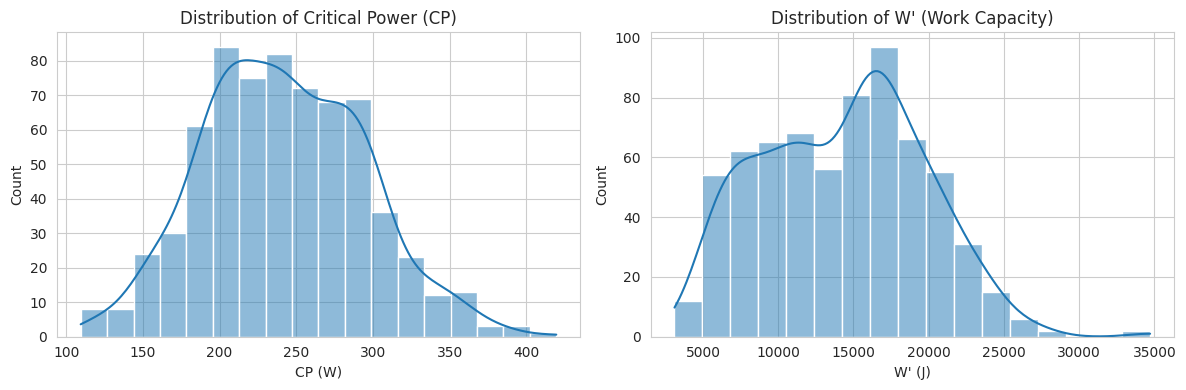

Top 10 features correlated with CP:
 Peak Power Output (W)    0.705902
VO2peak (L.min-1)        0.680372
GET (W)                  0.462724
Power_min                0.455667
Power_mean               0.454324
Power_max                0.453471
Power_intercept          0.442652
Height (m)               0.319650
Cadence_std              0.305758
Cadence_max              0.303689
Name: CP (W), dtype: float64 

Top 10 features correlated with W':
 Power_mean              0.580642
Power_max               0.538506
Power_range             0.447482
Power_std               0.402424
Power_min               0.339555
Power_intercept         0.337369
Power_delta             0.302507
Power_rate_of_change    0.302507
VO2peak (L.min-1)       0.286091
VO2_max                 0.266326
Name: W' (J), dtype: float64 



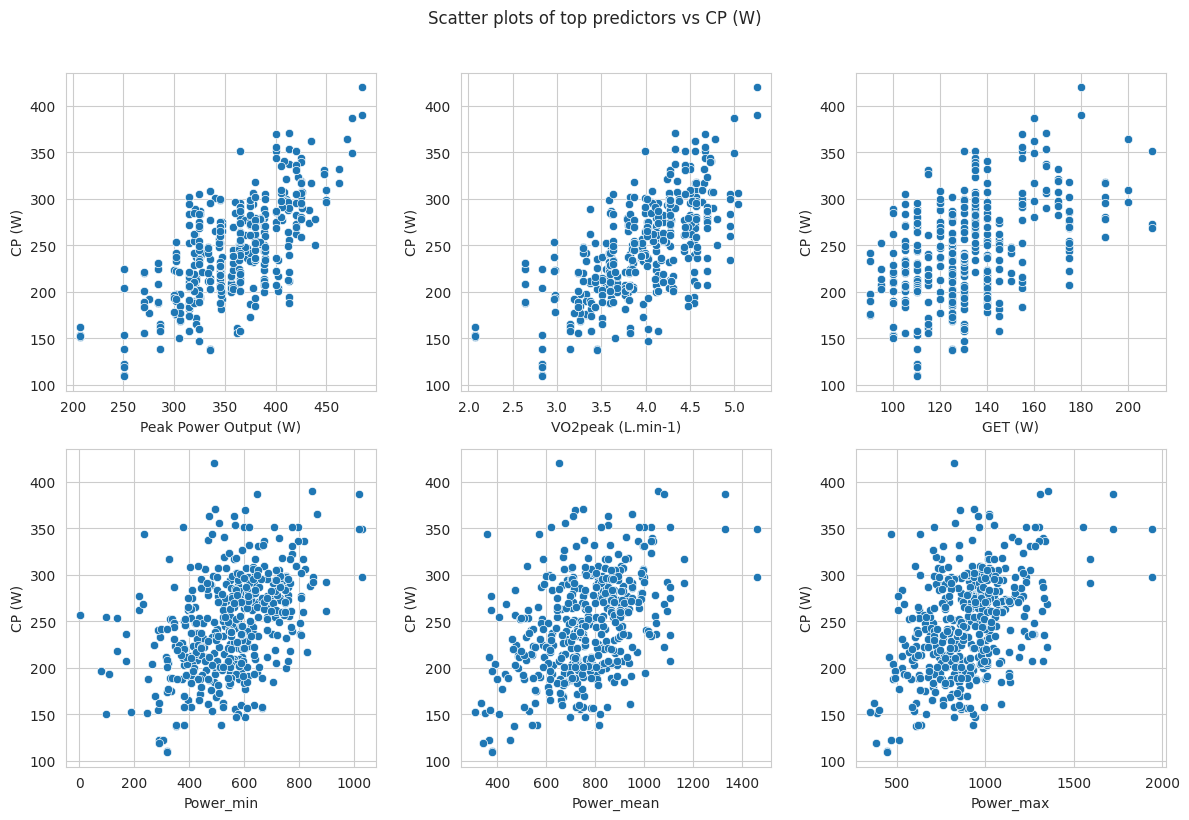

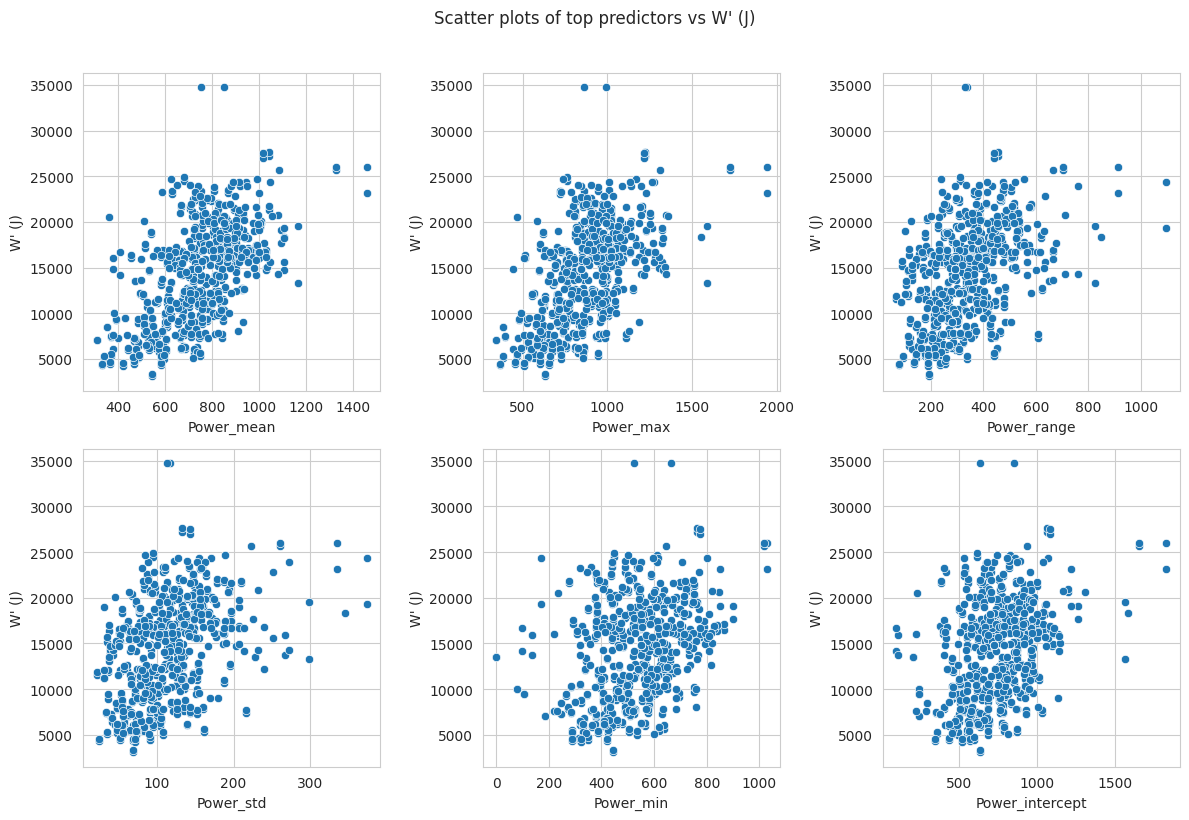

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution plots for CP and W'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['CP (W)'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Critical Power (CP)')
sns.histplot(df["W' (J)"], kde=True, ax=axes[1])
axes[1].set_title("Distribution of W' (Work Capacity)")
plt.tight_layout()
plt.show()

# 2. Correlation of features with CP and W'
corr_matrix = df.corr()
cp_corr = corr_matrix['CP (W)'].drop(['CP (W)', "W' (J)"]).abs().sort_values(ascending=False)
wp_corr = corr_matrix["W' (J)"].drop(['CP (W)', "W' (J)"]).abs().sort_values(ascending=False)

print("Top 10 features correlated with CP:\n", cp_corr.head(10), "\n")
print("Top 10 features correlated with W':\n", wp_corr.head(10), "\n")

# 3. Scatterplots for the top 6 predictors of each target
top6_cp = cp_corr.head(6).index.tolist()
top6_wp = wp_corr.head(6).index.tolist()

def plot_top_features(target, features):
    n = len(features)
    cols = 3
    rows = (n + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*4))
    axes = axes.flatten()
    for i, feat in enumerate(features):
        sns.scatterplot(x=df[feat], y=df[target], ax=axes[i])
        axes[i].set_xlabel(feat)
        axes[i].set_ylabel(target)
    # hide any unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    fig.suptitle(f'Scatter plots of top predictors vs {target}', y=1.02)
    plt.tight_layout()
    plt.show()

plot_top_features('CP (W)', top6_cp)
plot_top_features("W' (J)", top6_wp)


In [58]:
print("Shape :", df.shape)
df.info()
print("\nMissing values (non-zero only):")
print(df.isna().sum()[df.isna().sum() > 0])


Shape : (672, 44)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Dataset                 672 non-null    int64  
 1   SEX                     672 non-null    float64
 2   AGE (y)                 672 non-null    float64
 3   BM (kg)                 672 non-null    float64
 4   Height (m)              672 non-null    float64
 5   VO2peak (L.min-1)       672 non-null    float64
 6   Peak Power Output (W)   672 non-null    float64
 7   GET (L.min-1)           672 non-null    float64
 8   GET (W)                 672 non-null    float64
 9   Power_mean              672 non-null    float64
 10  Power_max               672 non-null    float64
 11  Power_min               672 non-null    float64
 12  Power_std               672 non-null    float64
 13  Power_range             672 non-null    float64
 14  Power_skew              

In [59]:
df.describe().T


count          mean          std          min  \
Dataset                 672.0    328.541667   194.009352     0.000000   
SEX                     672.0      1.000000     0.000000     1.000000   
AGE (y)                 672.0     26.980655     8.134740    18.000000   
BM (kg)                 672.0     76.905506    11.716882    50.500000   
Height (m)              672.0      1.774048     0.070095     1.600000   
VO2peak (L.min-1)       672.0      3.896360     0.567765     2.070000   
Peak Power Output (W)   672.0    356.492560    49.749476   207.000000   
GET (L.min-1)           672.0    122.991374   499.833780     1.390000   
GET (W)                 672.0    130.766369    23.073469    90.000000   
Power_mean              672.0    739.113929   173.159517   308.000000   
Power_max               672.0    870.701488   219.144526   346.000000   
Power_min               672.0    529.071131   154.989610     1.000000   
Power_std               672.0    114.930144    51.234378    21.525437   
Power_range             672.0    341.630357   146.113201    68.000000   
Power_skew              672.0     -0.724482     0.792111    -2.394886   
Power_kurtosis          672.0      0.354021     1.954675    -1.989215   
Power_slope             672.0      2.491291    24.898388  -107.116364   
Power_intercept         672.0    727.903117   220.419749    93.505455   
Power_delta             672.0    106.330357   195.846621  -674.600000   
Power_rate_of_change    672.0     11.814484    21.760736   -74.955556   
VO2_mean                672.0    138.592205    12.640319    90.400000   
VO2_max                 672.0    149.838452    13.441187   102.999998   
VO2_min                 672.0    120.773005    13.996406    46.000000   
VO2_std                 672.0      9.675299     3.559675     2.385605   
VO2_range               672.0     29.065447    10.613262     8.400000   
VO2_skew                672.0     -0.632395     0.785215    -2.470066   
VO2_kurtosis            672.0      0.240610     2.193514    -2.022296   
VO2_slope               672.0     -0.387980     2.029874    -7.717818   
VO2_intercept           672.0    140.338116    15.315949    63.349091   
VO2_delta               672.0      6.110090    17.715816   -51.920001   
VO2_rate_of_change      672.0      0.678899     1.968424    -5.768889   
Cadence_mean            672.0    202.045400   416.842485     0.553196   
Cadence_max             672.0    944.142174  1353.409993     1.102333   
Cadence_min             672.0     31.295188   247.678639     0.004000   
Cadence_std             672.0    337.348200   488.418004     0.053166   
Cadence_range           672.0    912.846986  1313.451389     0.170063   
Cadence_skew            672.0      0.504490     1.224984    -2.353829   
Cadence_kurtosis        672.0      1.002619     1.915670    -2.057237   
Cadence_slope           672.0     14.311987    26.625675   -33.323627   
Cadence_intercept       672.0    137.641458   348.733269  -330.062864   
Cadence_delta           672.0    250.096692   437.775088  -612.000000   
Cadence_rate_of_change  672.0     27.788521    48.641676   -68.000000   
CP (W)                  672.0    241.939777    52.573627   109.407143   
W' (J)                  672.0  14300.621739  5436.479933  3108.200000   

                                25%           50%           75%           max  
Dataset                  160.750000    328.500000    496.250000    664.000000  
SEX                        1.000000      1.000000      1.000000      1.000000  
AGE (y)                   21.000000     24.000000     31.000000     48.000000  
BM (kg)                   70.400000     75.000000     83.000000    128.000000  
Height (m)                 1.730000      1.770000      1.820000      1.980000  
VO2peak (L.min-1)          3.550000      3.951000      4.282000      5.250000  
Peak Power Output (W)    322.000000    358.000000    389.000000    485.000000  
GET (L.min-1)              1.910000      2.024000      2.160000   2673.000000  
GET (W)           

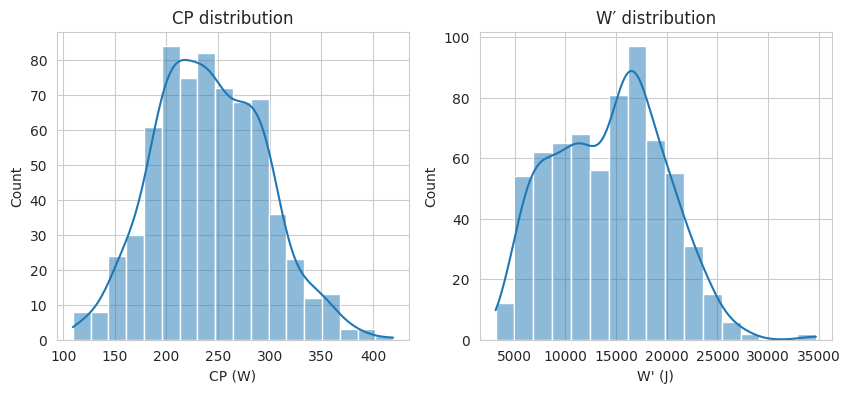

In [60]:
import matplotlib.pyplot as plt, seaborn as sns
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df["CP (W)"], kde=True, ax=ax[0]);  ax[0].set_title("CP distribution")
sns.histplot(df["W' (J)"], kde=True, ax=ax[1]); ax[1].set_title("W′ distribution")
plt.show()


In [61]:
print("GET (L·min⁻¹) top 5:", df["GET (L.min-1)"].sort_values(ascending=False).head())
print("Cadence_max top 5:",   df["Cadence_max"].sort_values(ascending=False).head())


GET (L·min⁻¹) top 5: 211    2673.0
4      2673.0
0      2602.0
208    2602.0
1      2602.0
Name: GET (L.min-1), dtype: float64
Cadence_max top 5: 195    5217.0
196    4826.0
197    4789.0
458    4574.0
600    4574.0
Name: Cadence_max, dtype: float64


In [62]:
# Cap outliers to reasonable physiological limits
df.loc[df["GET (L.min-1)"] > 6, "GET (L.min-1)"] = 6
df.loc[df["Cadence_max"] > 250, "Cadence_max"] = 250


In [63]:
print("\nRecheck max values post-capping:")
print("GET (L.min-1):", df["GET (L.min-1)"].max())
print("Cadence_max:", df["Cadence_max"].max())



Recheck max values post-capping:
GET (L.min-1): 6.0
Cadence_max: 250.0


In [64]:
corr = df.corr(numeric_only=True)

print("\nTop 10 |corr| with CP:")
print(corr["CP (W)"].drop(["CP (W)", "W' (J)"]).abs().sort_values(ascending=False).head(10))

print("\nTop 10 |corr| with W':")
print(corr["W' (J)"].drop(["CP (W)", "W' (J)"]).abs().sort_values(ascending=False).head(10))



Top 10 |corr| with CP:
Peak Power Output (W)    0.705902
VO2peak (L.min-1)        0.680372
GET (W)                  0.462724
Power_min                0.455667
Power_mean               0.454324
Power_max                0.453471
Power_intercept          0.442652
GET (L.min-1)            0.396538
Height (m)               0.319650
Cadence_std              0.305758
Name: CP (W), dtype: float64

Top 10 |corr| with W':
Power_mean              0.580642
Power_max               0.538506
Power_range             0.447482
Power_std               0.402424
Power_min               0.339555
Power_intercept         0.337369
Power_delta             0.302507
Power_rate_of_change    0.302507
VO2peak (L.min-1)       0.286091
VO2_max                 0.266326
Name: W' (J), dtype: float64


In [65]:
!pip install scipy scikit-learn


/tmp/ipython-input-594722347.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_skew.values, y=high_skew.index, palette="Spectral")


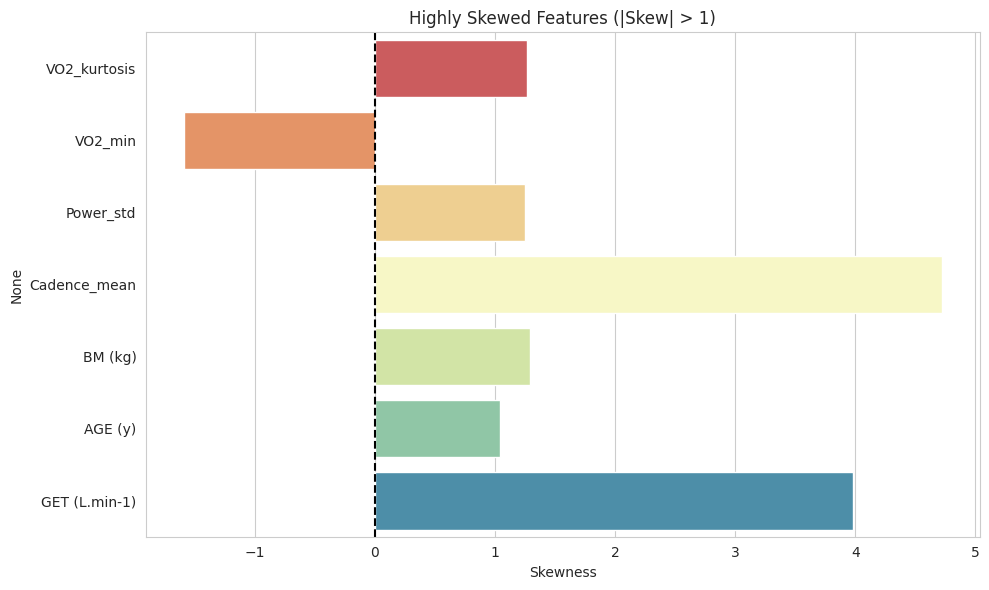

KeyError: "['Cadence_max', 'Cadence_skew', 'Cadence_mean', 'Cadence_std', 'Cadence_range'] not in index"

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import skew

# Load data
df = pd.read_csv("Final_Processed_Dataset.csv")

# ----- 1. Correlation Selection -----
top_cp_corr = df.corr(numeric_only=True)["CP (W)"].abs().sort_values(ascending=False).drop("CP (W)").head(20)
top_w_corr = df.corr(numeric_only=True)["W' (J)"].abs().sort_values(ascending=False).drop("W' (J)").head(20)

top_features = list(set(top_cp_corr.index).union(set(top_w_corr.index)))

# ----- 2. Skewed Features and Box-Cox Transformation -----
skewed_feats = df[top_features].apply(lambda x: skew(x.dropna()))
high_skew = skewed_feats[skewed_feats.abs() > 1]

pt = PowerTransformer(method='box-cox', standardize=False)
for col in high_skew.index:
    # Ensure strictly positive for Box-Cox
    if (df[col] <= 0).any():
        df[col] = df[col] + abs(df[col].min()) + 1
    df[col] = pt.fit_transform(df[[col]])

# ----- 3. Interaction Features -----
df["Power_per_BM"] = df["Power_mean"] / df["BM (kg)"]
df["VO2_per_Height"] = df["VO2peak (L.min-1)"] / df["Height (m)"]

# ----- 4. PCA on Cadence Features -----
cadence_cols = [col for col in df.columns if "Cadence_" in col]
scaler = StandardScaler()
cadence_scaled = scaler.fit_transform(df[cadence_cols])
pca = PCA(n_components=2)
cadence_pca = pca.fit_transform(cadence_scaled)
df["Cadence_PC1"] = cadence_pca[:, 0]
df["Cadence_PC2"] = cadence_pca[:, 1]
df.drop(columns=cadence_cols, inplace=True)

# ========== PLOTS ==========

# ----- Plot 1: Highly Skewed Features -----
plt.figure(figsize=(10, 6))
sns.barplot(x=high_skew.values, y=high_skew.index, palette="Spectral")
plt.axvline(0, color='k', linestyle='--')
plt.title("Highly Skewed Features (|Skew| > 1)")
plt.xlabel("Skewness")
plt.tight_layout()
plt.show()

# ----- Plot 2: Correlation Heatmap -----
corr_matrix = df[top_features].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap: Top 20 Features Related to CP and W′")
plt.tight_layout()
plt.show()


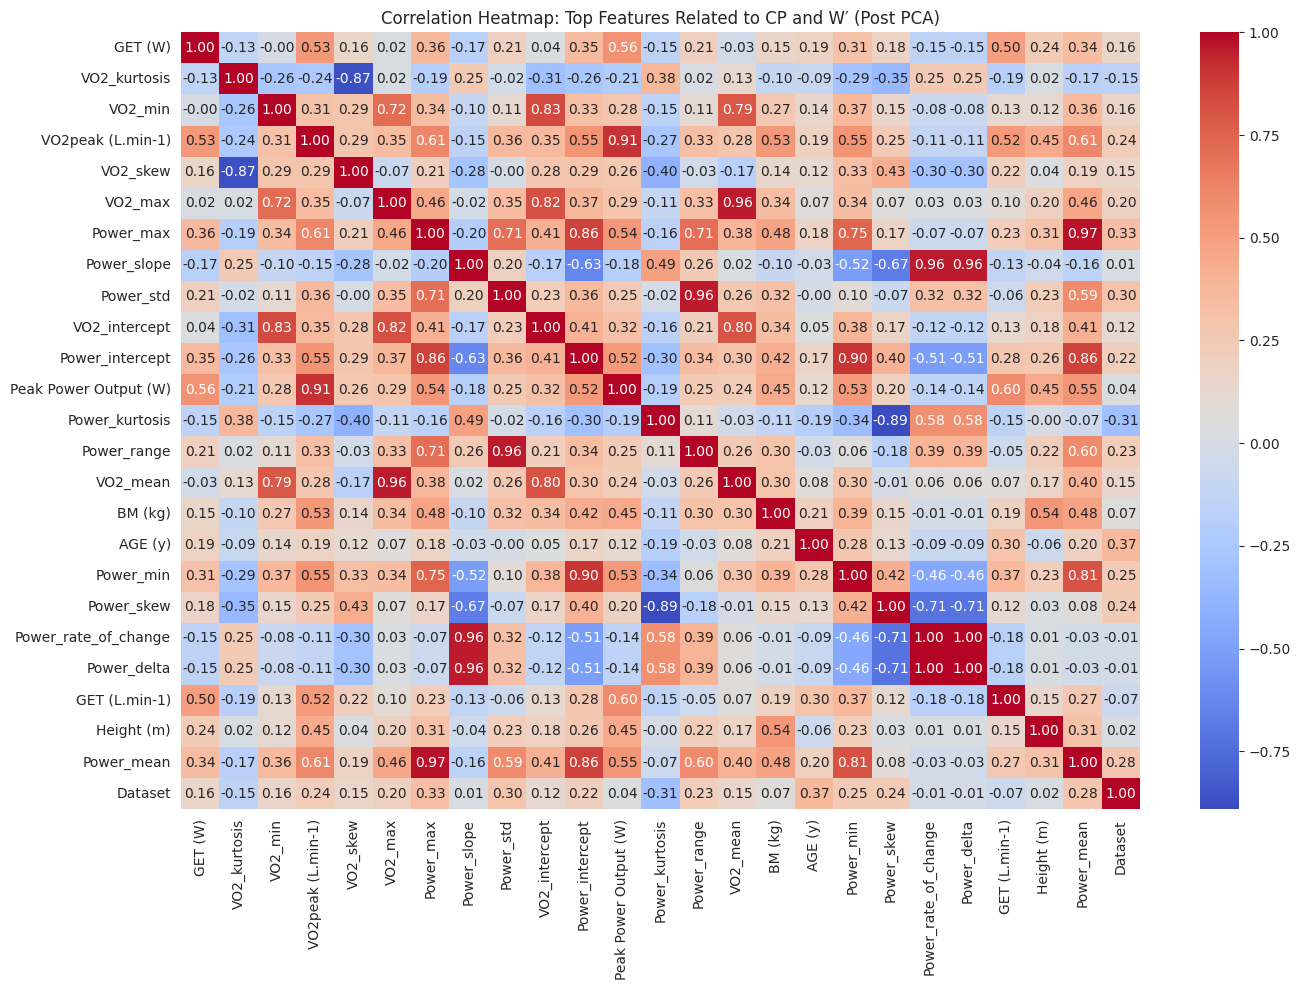

In [67]:
# Remove any dropped features from top_features list
available_top_features = [feat for feat in top_features if feat in df.columns]

# Plot 2: Correlation Heatmap
corr_matrix = df[available_top_features].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap: Top Features Related to CP and W′ (Post PCA)")
plt.tight_layout()
plt.show()


In [68]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns


In [69]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [70]:
# Replace with your actual file path if needed
df = pd.read_csv("Final_Processed_Dataset.csv")


In [71]:
# Top 10 absolute correlations with CP and W′
top_cp = df.corr(numeric_only=True)["CP (W)"].abs().sort_values(ascending=False)[1:11].index.tolist()
top_wp = df.corr(numeric_only=True)["W' (J)"].abs().sort_values(ascending=False)[1:11].index.tolist()

# Combine and remove duplicates
selected_corr_features = list(set(top_cp + top_wp))


In [72]:
skewed_features = [
    "Power_kurtosis", "Cadence_kurtosis", "VO2_kurtosis",
    "Cadence_skew", "Power_skew", "VO2_skew"
]

for col in skewed_features:
    if (df[col] <= 0).any():
        df[col] += abs(df[col].min()) + 1  # Shift to positive
    df[col], _ = boxcox(df[col])


In [73]:
df["Power_per_BM"] = df["Power_mean"] / df["BM (kg)"]
df["VO2peak_per_Height"] = df["VO2peak (L.min-1)"] / df["Height (m)"]
df["Power_to_VO2"] = df["Power_mean"] / df["VO2peak (L.min-1)"]
df["PPO_to_CP"] = df["Peak Power Output (W)"] / df["CP (W)"]


In [74]:
# Select cadence features excluding Cadence_mean/max/min
cadence_cols = [
    col for col in df.columns
    if "Cadence" in col and col not in ["Cadence_mean", "Cadence_max", "Cadence_min"]
]

# Standardize cadence features
scaler = StandardScaler()
cadence_scaled = scaler.fit_transform(df[cadence_cols])

# Apply PCA (3 components)
pca = PCA(n_components=3)
cadence_pca = pca.fit_transform(cadence_scaled)

# Add PCA features back to df
for i in range(3):
    df[f"Cadence_PCA_{i+1}"] = cadence_pca[:, i]


In [75]:
# Combine correlated, interaction, and PCA features
final_features = list(set(selected_corr_features + [
    "Power_per_BM", "VO2peak_per_Height", "Power_to_VO2", "PPO_to_CP",
    "Cadence_PCA_1", "Cadence_PCA_2", "Cadence_PCA_3"
]))

X = df[final_features]
y_cp = df["CP (W)"]
y_wp = df["W' (J)"]


In [76]:
df = pd.read_csv("Final_Processed_Dataset.csv")


In [77]:
# Get top 10 most correlated features with CP and W'
top_cp = df.corr(numeric_only=True)["CP (W)"].abs().sort_values(ascending=False)[1:11].index.tolist()
top_wp = df.corr(numeric_only=True)["W' (J)"].abs().sort_values(ascending=False)[1:11].index.tolist()

# Combine and deduplicate
selected_corr_features = list(set(top_cp + top_wp))


In [78]:
skewed_features = [
    "Power_kurtosis", "Cadence_kurtosis", "VO2_kurtosis",
    "Cadence_skew", "Power_skew", "VO2_skew"
]

# Add 1 to avoid negative/zero values
for col in skewed_features:
    if (df[col] <= 0).any():
        df[col] = df[col] + abs(df[col].min()) + 1
    df[col], _ = boxcox(df[col])


In [79]:
df["Power_per_BM"] = df["Power_mean"] / df["BM (kg)"]
df["VO2peak_per_Height"] = df["VO2peak (L.min-1)"] / df["Height (m)"]
df["Power_to_VO2"] = df["Power_mean"] / df["VO2peak (L.min-1)"]
df["PPO_to_CP"] = df["Peak Power Output (W)"] / df["CP (W)"]


In [80]:
cadence_cols = [col for col in df.columns if "Cadence" in col and col not in ["Cadence_mean", "Cadence_max", "Cadence_min"]]

# Scale before PCA
scaler = StandardScaler()
cadence_scaled = scaler.fit_transform(df[cadence_cols])

pca = PCA(n_components=3)
cadence_pca = pca.fit_transform(cadence_scaled)

# Add PCA features to df
for i in range(3):
    df[f"Cadence_PCA_{i+1}"] = cadence_pca[:, i]

# Optionally drop original cadence features
# df.drop(columns=cadence_cols, inplace=True)


In [81]:
# Combine all relevant features
final_features = list(set(selected_corr_features + [
    "Power_per_BM", "VO2peak_per_Height", "Power_to_VO2", "PPO_to_CP",
    "Cadence_PCA_1", "Cadence_PCA_2", "Cadence_PCA_3"
]))

X = df[final_features]
y_cp = df["CP (W)"]
y_wp = df["W' (J)"]


In [82]:
!pip install lightgbm


In [83]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

# 1. Load your dataset (adjust path as needed)
df = df

# 2. Select features
selected_features_cp = [
    "VO2peak (L.min-1)", "Peak Power Output (W)", "GET (L.min-1)", "GET (W)", "Power_mean",
    "Cadence_std", "Cadence_max", "Cadence_range", "Cadence_skew", "Cadence_kurtosis",
    "Power_slope", "Power_intercept", "Cadence_slope", "Cadence_intercept", "Cadence_delta"
]

selected_features_w = [
    "Power_mean", "Power_max", "Cadence_std", "Cadence_max", "Cadence_range", "Cadence_skew",
    "Cadence_kurtosis", "Power_slope", "Power_intercept", "Power_delta", "Power_rate_of_change",
    "Cadence_slope", "Cadence_intercept", "Cadence_delta", "Cadence_rate_of_change"
]

X_cp = df[selected_features_cp]
X_w  = df[selected_features_w]
y_cp = df["CP (W)"]
y_w  = df["W' (J)"]

# 3. Split into train/test
X_cp_train, X_cp_test, y_cp_train, y_cp_test = train_test_split(
    X_cp, y_cp, test_size=0.2, random_state=42
)
X_w_train, X_w_test, y_w_train, y_w_test = train_test_split(
    X_w, y_w, test_size=0.2, random_state=42
)

# 4. Best hyperparameters
best_xgb_params_cp = {
    "n_estimators": 397, "max_depth": 10, "learning_rate": 0.0511, "subsample": 0.9832,
    "colsample_bytree": 0.5999, "min_child_weight": 1, "gamma": 1.98e-6,
    "reg_lambda": 1.52e-5, "reg_alpha": 2.77e-7, "objective": "reg:squarederror", "random_state": 42
}

best_xgb_params_w = {
    "n_estimators": 342, "max_depth": 11, "learning_rate": 0.0298, "subsample": 0.8070,
    "colsample_bytree": 0.7839, "min_child_weight": 1, "gamma": 3.77e-8,
    "reg_lambda": 1.09e-7, "reg_alpha": 0.0632, "objective": "reg:squarederror", "random_state": 42
}

best_et_params_cp = {
    "n_estimators": 269, "max_depth": 20, "min_samples_split": 2,
    "min_samples_leaf": 1, "max_features": 0.7026, "random_state": 42
}

best_et_params_w = {
    "n_estimators": 121, "max_depth": 15, "min_samples_split": 2,
    "min_samples_leaf": 1, "max_features": 0.7337, "random_state": 42
}

# 5. Train base models
xgb_cp = xgb.XGBRegressor(**best_xgb_params_cp)
xgb_cp.fit(X_cp_train, y_cp_train)

xgb_w = xgb.XGBRegressor(**best_xgb_params_w)
xgb_w.fit(X_w_train, y_w_train)

et_cp = ExtraTreesRegressor(**best_et_params_cp)
et_cp.fit(X_cp_train, y_cp_train)

et_w = ExtraTreesRegressor(**best_et_params_w)
et_w.fit(X_w_train, y_w_train)

# 6. Predict and stack with equal weights
w_xgb = 0.5
w_et  = 0.5

y_cp_pred_xgb = xgb_cp.predict(X_cp_test)
y_cp_pred_et  = et_cp.predict(X_cp_test)
y_cp_stacked  = w_xgb * y_cp_pred_xgb + w_et * y_cp_pred_et

y_w_pred_xgb  = xgb_w.predict(X_w_test)
y_w_pred_et   = et_w.predict(X_w_test)
y_w_stacked   = w_xgb * y_w_pred_xgb + w_et * y_w_pred_et

# 7. Evaluate
mape_cp = mean_absolute_percentage_error(y_cp_test, y_cp_stacked) * 100
mape_w  = mean_absolute_percentage_error(y_w_test,  y_w_stacked) * 100

print("Stacking MAPE for CP (W):", mape_cp)
print("Stacking MAPE for W' (J):", mape_w)


Stacking MAPE for CP (W): 4.639162942760287
Stacking MAPE for W' (J): 9.359414573500313


In [84]:
import optuna
from sklearn.metrics import mean_absolute_percentage_error

# 1. Define Optuna objective (uses your already computed predictions)
def objective(trial):
    w = trial.suggest_float("w_xgb", 0.0, 1.0)
    # Ensemble predictions with weight w for XGB, (1-w) for ET
    cp_pred = w * y_cp_pred_xgb + (1 - w) * y_cp_pred_et
    w_pred  = w * y_w_pred_xgb  + (1 - w) * y_w_pred_et
    # Return average MAPE
    return (mean_absolute_percentage_error(y_cp_test, cp_pred) +
            mean_absolute_percentage_error(y_w_test, w_pred)) / 2

# 2. Run the study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

# 3. Retrieve and apply best weight
w_opt = study.best_params["w_xgb"]
print(f"Optimized XGB weight: {w_opt:.3f}, ET weight: {1-w_opt:.3f}")

# 4. Final ensemble with optimized weight
cp_ens_opt = w_opt * y_cp_pred_xgb + (1 - w_opt) * y_cp_pred_et
w_ens_opt  = w_opt * y_w_pred_xgb  + (1 - w_opt) * y_w_pred_et

print("Optimized Stacking MAPE for CP:", mean_absolute_percentage_error(y_cp_test, cp_ens_opt) * 100)
print("Optimized Stacking MAPE for W':", mean_absolute_percentage_error(y_w_test, w_ens_opt) * 100)


[I 2025-08-02 12:06:52,883] A new study created in memory with name: no-name-cb64e0da-a628-4899-89ca-29ef6ce7e764
[I 2025-08-02 12:06:52,890] Trial 0 finished with value: 0.06970279648245903 and parameters: {'w_xgb': 0.7676126624104115}. Best is trial 0 with value: 0.06970279648245903.
[I 2025-08-02 12:06:52,897] Trial 1 finished with value: 0.06983049405771626 and parameters: {'w_xgb': 0.8390805379971049}. Best is trial 0 with value: 0.06970279648245903.
[I 2025-08-02 12:06:52,904] Trial 2 finished with value: 0.07212626331838942 and parameters: {'w_xgb': 0.03501141362100069}. Best is trial 0 with value: 0.06970279648245903.
[I 2025-08-02 12:06:52,909] Trial 3 finished with value: 0.06988774437060122 and parameters: {'w_xgb': 0.8711194712223936}. Best is trial 0 with value: 0.06970279648245903.
[I 2025-08-02 12:06:52,914] Trial 4 finished with value: 0.06962032494331408 and parameters: {'w_xgb': 0.7172491375190477}. Best is trial 4 with value: 0.06962032494331408.
[I 2025-08-02 12:06:

Optimized XGB weight: 0.674, ET weight: 0.326
Optimized Stacking MAPE for CP: 4.691321499007047
Optimized Stacking MAPE for W': 9.229002073890644
